# Week 3 - Project
## Scenario 2 - Liquor Store Expansion

## Submitted By Tiffany Wilson
June 27, 2016

# Problem Statement

Find a location (or locations) in Iowa, where a liquor store could be opened and yield high sales.

# Data Set

We are working with a manageable subset (10%) of the aggregate data.

The data we are using includes Vendor ID, location data (zip code, county, city), product costs (state and retail), all sales for 2015 and sales in 2016 until March.

# Plan of Action
### Prepare Data
Clean and review the data.

### Report
Create reports & visualizations of liquor sales by County & Zip:
* Current YTD Sales (Bottles Sold, Sales Price, Avg Bottle Cost, Avg Bottles Sold)
* Previous Year’s Sales (Bottles Sold, Sales Price, Avg Bottle Cost, Avg Bottles Sold)
* Current YTD Sales by Month (Bottles Sold, Sales Price, Avg Bottle Cost, Avg Bottles Sold)
* Previous Year’s Sales by Month (Bottles Sold, Sales Price, Avg Bottle Cost, Avg Bottles Sold)

### Review
Review reports and observe any trends in alcohol sales (increase or decline) by location.

### Predict
Generate a predictive model to attempt to identify a location that will yield high sales.

### Summary
Final review and findings.

# STEP 1. Prepare Data
Begin by loading, inspecting, cleaning, and transforming the data set.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data into a DataFrame
filename='Iowa_Liquor_sales_sample_10pct.csv'  # Subset of the master dataset (10%)
dfLiquorSales = pd.read_csv(filename)

# Take a peek at the data.
print dfLiquorSales.shape
dfLiquorSales.info()
dfLiquorSales.head()

(270955, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [9]:
# Drop those rows that have nulls
dfLiquorSales.dropna(inplace=True)

# Transform 'Date' to datetime type.
dfLiquorSales["Date"] = pd.to_datetime(dfLiquorSales["Date"], format="%m/%d/%Y")

# Convert the 'Sale (Dollars)', 'State Bottle Retail', and 'State Bottle Cost' column to a float.
#str.replace(pat, repl,  ==> use this to remove the '$' from these columns.
dfLiquorSales['Sale (Dollars)'] = [float(x[1::]) for x in dfLiquorSales['Sale (Dollars)']]
dfLiquorSales['State Bottle Cost'] = [float(x[1::]) for x in dfLiquorSales['State Bottle Cost']]
dfLiquorSales['State Bottle Retail'] = [float(x[1::]) for x in dfLiquorSales['State Bottle Retail']]

# Convert 'County Number' to an int.
dfLiquorSales['County Number'] = [int(x) for x in dfLiquorSales['County Number']]

# Convert 'Zip Code' to a string.
dfLiquorSales['Zip Code'] = [str(x) for x in dfLiquorSales['Zip Code']]

# Remove the 'Category' and 'Item Number' columns
del dfLiquorSales['Category']
del dfLiquorSales['Item Number']

# Add a 'Price Per Liter' column
# Price per Liter = State Bottle Retail / Bottle Volume (ml) * 1000
dfLiquorSales['Price Per Liter'] = dfLiquorSales['State Bottle Retail'] / dfLiquorSales['Bottle Volume (ml)'] * 1000
# Add a 'Margin' column
# 'State Bottle Retail' - 'State Bottle Cost'
dfLiquorSales['Margin'] = dfLiquorSales['State Bottle Retail'] - dfLiquorSales['State Bottle Cost']
dfLiquorSales['Sale Margin'] = dfLiquorSales['Margin'] * dfLiquorSales['Bottles Sold']

print dfLiquorSales.shape
dfLiquorSales.info()
dfLiquorSales.head()

# Save clean copy of data to file.
dfLiquorSales.to_csv('LiquorSalesClean.csv')

(269258, 19)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 269258 entries, 0 to 270954
Data columns (total 19 columns):
Date                     269258 non-null datetime64[ns]
Store Number             269258 non-null int64
City                     269258 non-null object
Zip Code                 269258 non-null object
County Number            269258 non-null int64
County                   269258 non-null object
Category Name            269258 non-null object
Vendor Number            269258 non-null int64
Item Description         269258 non-null object
Bottle Volume (ml)       269258 non-null int64
State Bottle Cost        269258 non-null float64
State Bottle Retail      269258 non-null float64
Bottles Sold             269258 non-null int64
Sale (Dollars)           269258 non-null float64
Volume Sold (Liters)     269258 non-null float64
Volume Sold (Gallons)    269258 non-null float64
Price Per Liter          269258 non-null float64
Margin                   269258 non-null float64
Sa

# STEP 2. Report
## Inspect data in Tableau
Inspecting the data in Tableau can oftentime reveal errors in the data.  
The following reports were created:
* Geographic Annual Sales by Zip
* Geographic Annual Profit by Zip
* Top 10 Annual Sales by Zip (Bar)
* Top 10 by Zip (Report)
* Top 10 by Zip & Store (Report)
* Top 10 by Zip (Charts)
* Top 10 by Zip (Line Chart)

***These reports will be turned in separately, along with this Notebook.***

After exploring the data in Tableau, I discovered some additional errant data that requires cleaning.

NOTE:  Assumptions were made about some of the data corrections.  In a real world situation,
I might try to obtain additional data to confirm the corrections.

In [10]:
#The 'Zip Code' for the city of Burlington is 56201, but it should be 52601
dfLiquorSales['Zip Code'] = dfLiquorSales['Zip Code'].apply(lambda x: '52601' if x == '56201' else x)
# Fix some other zip codes...
dfLiquorSales['Zip Code'] = dfLiquorSales['Zip Code'].apply(lambda x: '52804' if x == '52084' else x)
dfLiquorSales['Zip Code'] = dfLiquorSales['Zip Code'].apply(lambda x: '52057' if x == '52087' else x)
dfLiquorSales['Zip Code'] = dfLiquorSales['Zip Code'].apply(lambda x: '52403' if x == '52303' else x)

dfLiquorSales.dropna(inplace=True) # Drop any nulls again.

# STEP 3.  Predict
Generate predictive models.

In [11]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm

def plot_regression(x, y, model):
    plt.figure(figsize=(10,8))  # Resize plot to 10 w x 8 h
    axes = plt.gca() #Get current axes 
    
    intercept = model.params[0]  # This is y
    slope = model.params[1]  # This is x

    for x_, y_ in zip(x, y):    
        plt.plot((x_, x_), (y_, x_*slope + intercept),  
                 'k-', ls='dashed', lw=1)  # plot the dashed lines from the datapoint to it's predicted regression value
        
    plt.scatter(x, y, s=70, c='steelblue')  # Plot original x and y
    
    x_points = np.linspace(axes.get_xlim()[0], axes.get_xlim()[1], 100)
    
    regline_x = x_points
    regline_y = x_points*slope + intercept

    plt.plot(regline_x, regline_y, c='darkred', lw=3.5)

    plt.show()

In [14]:
# Get Sample Data for modeling
# Generate a random set of indexes.
n = 100  # sample size
randIndexes =  np.random.choice(np.arange(0,dfLiquorSales.shape[0]),size=n)

# Choose the variables we want to compare.
varColList = dfLiquorSales.columns
varColList = np.delete(varColList,[0,1,2,3,4,5,6,7,8,9]) # We don't want these columns as our variables.
varColList

# Put the results of each model into a dataframe
runCount = 0
dictModelResults = {'Run':[],
                    'Type':[],
                    'X Variable':[],
                    'Y Variable':[],
                    'N':[],
                    'R_Squared':[],
                    'Std':[],
                    'MSE_Total':[],
                    'Coefficients':[],
                    'SSE':[],
                    'RMSE':[],
                    'MAE':[]}

                             OLS Regression Results                            
Dep. Variable:     State Bottle Retail   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 5.018e+06
Date:                 Sun, 26 Jun 2016   Prob (F-statistic):          1.41e-232
Time:                         22:14:27   Log-Likelihood:                 205.59
No. Observations:                  100   AIC:                            -407.2
Df Residuals:                       98   BIC:                            -402.0
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                 0.0084

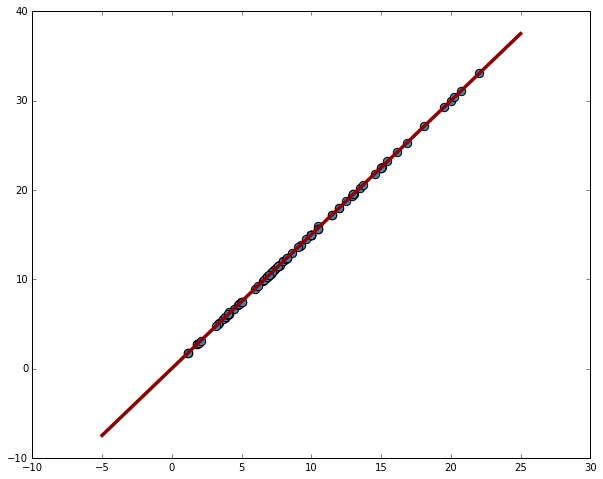

-----------------------------------------------------------
                          QuantReg Regression Results                          
Dep. Variable:     State Bottle Retail   Pseudo R-squared:               0.9988
Model:                        QuantReg   Bandwidth:                    0.004115
Method:                  Least Squares   Sparsity:                      0.01016
Date:                 Sun, 26 Jun 2016   No. Observations:                  100
Time:                         22:14:28   Df Residuals:                       98
                                         Df Model:                            1
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const              8.089e-06      0.001      0.008      0.994        -0.002     0.002
State Bottle Cost     1.5000      0.000   1.38e+04      0.000         1.500     1.500


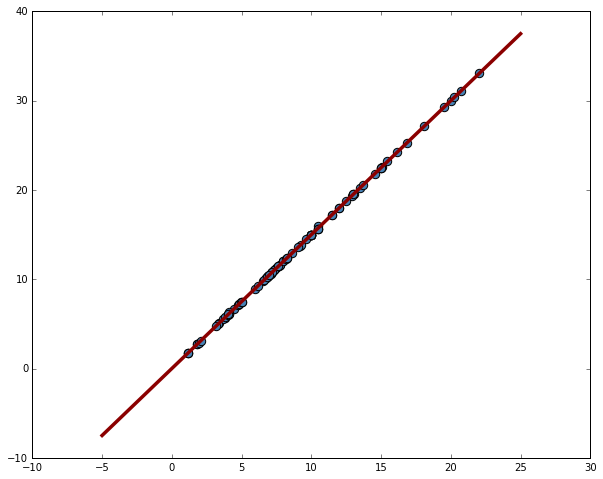

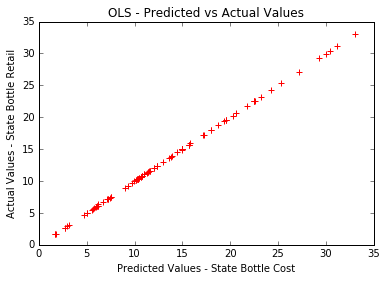

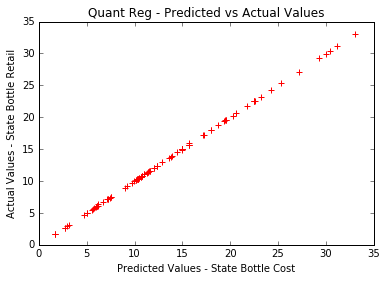

                            OLS Regression Results                            
Dep. Variable:           Bottles Sold   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.07633
Date:                Sun, 26 Jun 2016   Prob (F-statistic):              0.783
Time:                        22:14:29   Log-Likelihood:                -391.09
No. Observations:                 100   AIC:                             786.2
Df Residuals:                      98   BIC:                             791.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                 7.6311      2.58

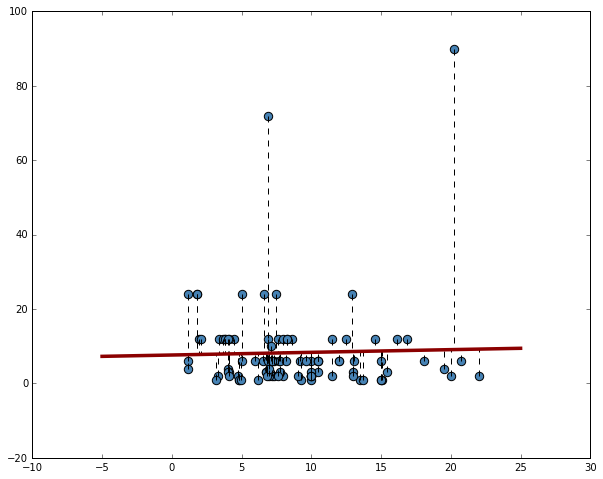

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:           Bottles Sold   Pseudo R-squared:             0.002133
Model:                       QuantReg   Bandwidth:                       7.405
Method:                 Least Squares   Sparsity:                        15.03
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:14:30   Df Residuals:                       98
                                        Df Model:                            1
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                 7.1002      1.590      4.465      0.000         3.944    10.256
State Bottle Cost    -0.1590      0.161     -0.988      0.325        -0.478     0.160


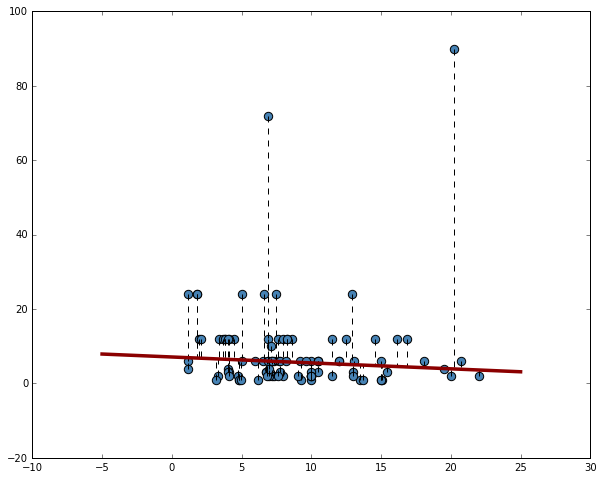

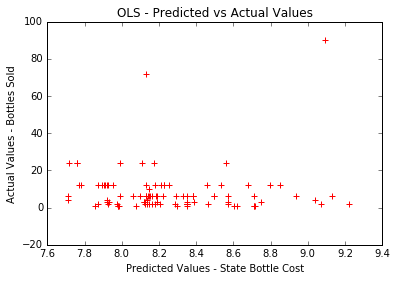

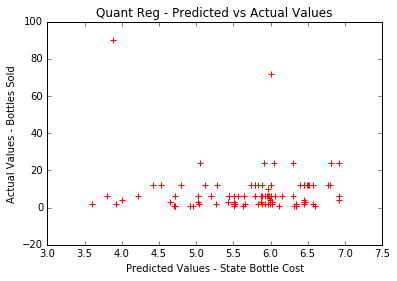

                            OLS Regression Results                            
Dep. Variable:           Bottles Sold   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.07490
Date:                Sun, 26 Jun 2016   Prob (F-statistic):              0.785
Time:                        22:14:31   Log-Likelihood:                -391.09
No. Observations:                 100   AIC:                             786.2
Df Residuals:                      98   BIC:                             791.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                   7.6366    

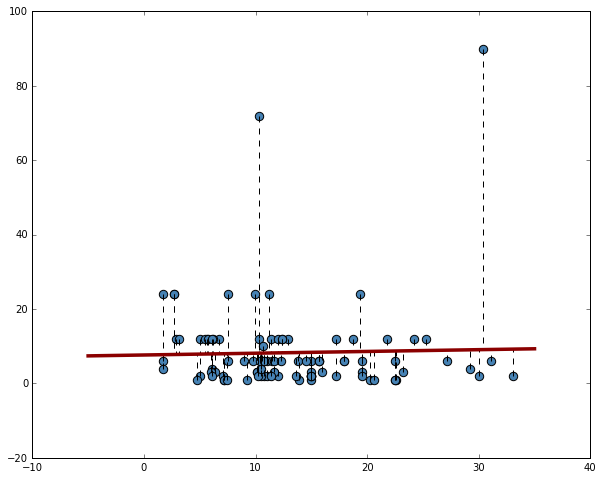

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:           Bottles Sold   Pseudo R-squared:             0.002212
Model:                       QuantReg   Bandwidth:                       7.405
Method:                 Least Squares   Sparsity:                        15.03
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:14:31   Df Residuals:                       98
                                        Df Model:                            1
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                   7.1002      1.591      4.463      0.000         3.943    10.257
State Bottle Retail    -0.1060      0.107     -0.988      0.325        -0.319     0.107


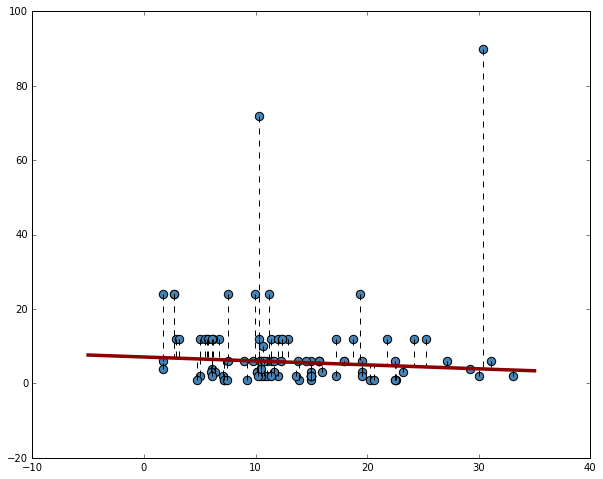

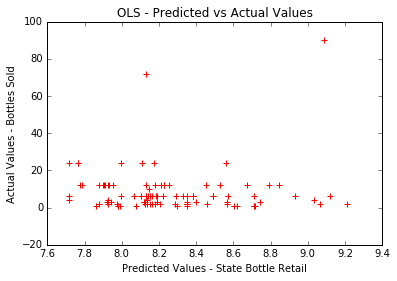

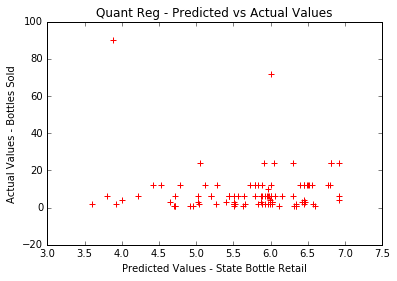

                            OLS Regression Results                            
Dep. Variable:         Sale (Dollars)   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     11.23
Date:                Sun, 26 Jun 2016   Prob (F-statistic):            0.00114
Time:                        22:14:32   Log-Likelihood:                -700.84
No. Observations:                 100   AIC:                             1406.
Df Residuals:                      98   BIC:                             1411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const               -58.5925     57.19

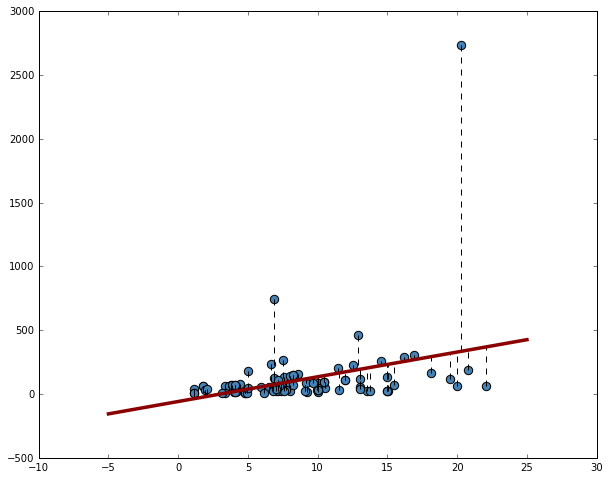

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:         Sale (Dollars)   Pseudo R-squared:              0.02888
Model:                       QuantReg   Bandwidth:                       56.33
Method:                 Least Squares   Sparsity:                        146.2
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:14:33   Df Residuals:                       98
                                        Df Model:                            1
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                24.1715     15.467      1.563      0.121        -6.522    54.865
State Bottle Cost     5.5070      1.564      3.520      0.001         2.402     8.612


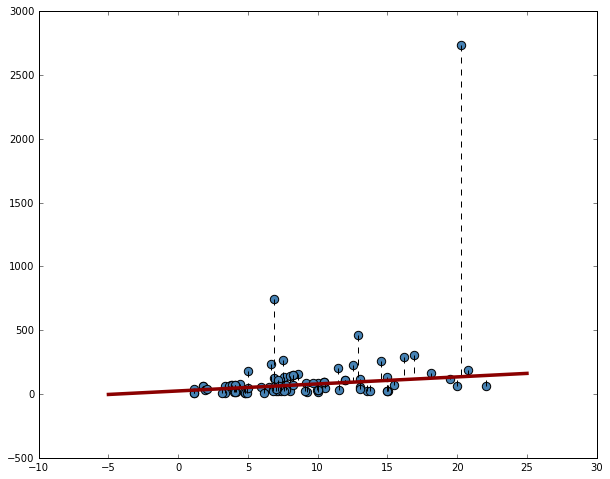

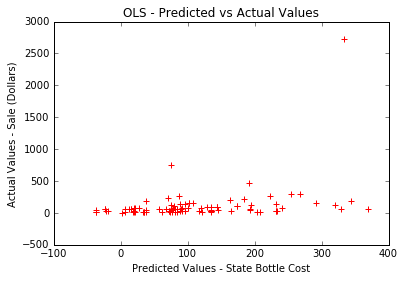

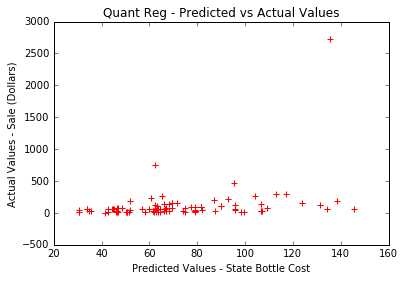

                            OLS Regression Results                            
Dep. Variable:         Sale (Dollars)   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     11.22
Date:                Sun, 26 Jun 2016   Prob (F-statistic):            0.00115
Time:                        22:14:34   Log-Likelihood:                -700.84
No. Observations:                 100   AIC:                             1406.
Df Residuals:                      98   BIC:                             1411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                 -58.6481    

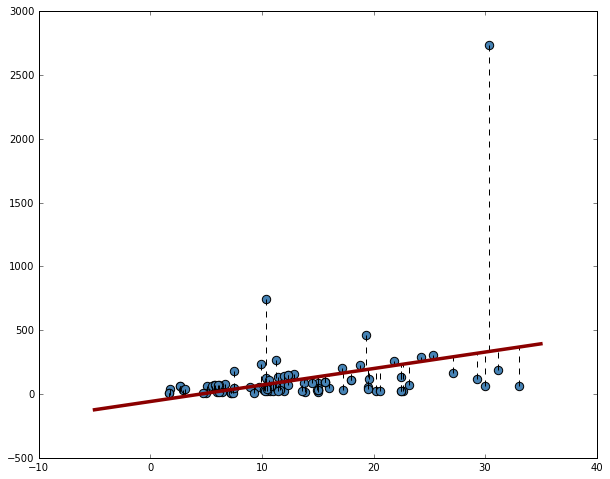

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:         Sale (Dollars)   Pseudo R-squared:              0.02868
Model:                       QuantReg   Bandwidth:                       56.33
Method:                 Least Squares   Sparsity:                        146.3
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:14:34   Df Residuals:                       98
                                        Df Model:                            1
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                  24.1460     15.485      1.559      0.122        -6.584    54.876
State Bottle Retail     3.6738      1.044      3.520      0.001         1.602     5.745


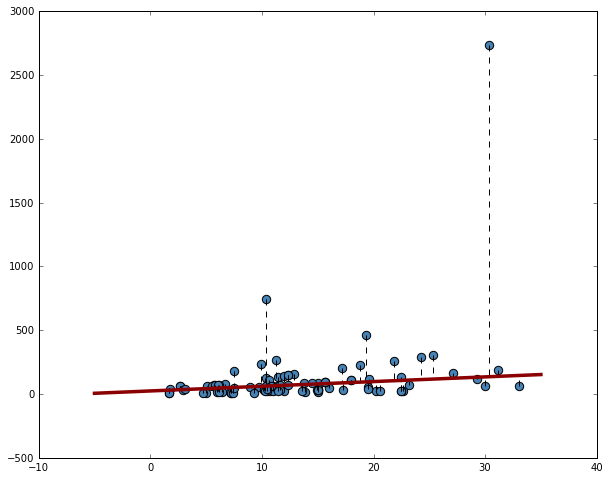

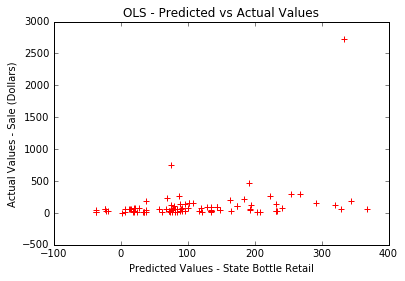

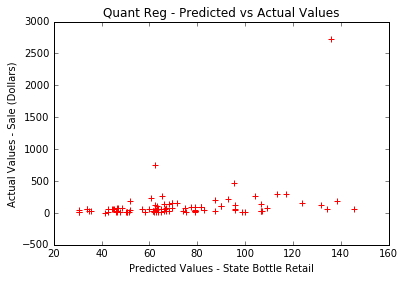

                            OLS Regression Results                            
Dep. Variable:         Sale (Dollars)   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     252.3
Date:                Sun, 26 Jun 2016   Prob (F-statistic):           7.39e-29
Time:                        22:14:35   Log-Likelihood:                -642.58
No. Observations:                 100   AIC:                             1289.
Df Residuals:                      98   BIC:                             1294.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const          -53.4653     18.282     -2.924   

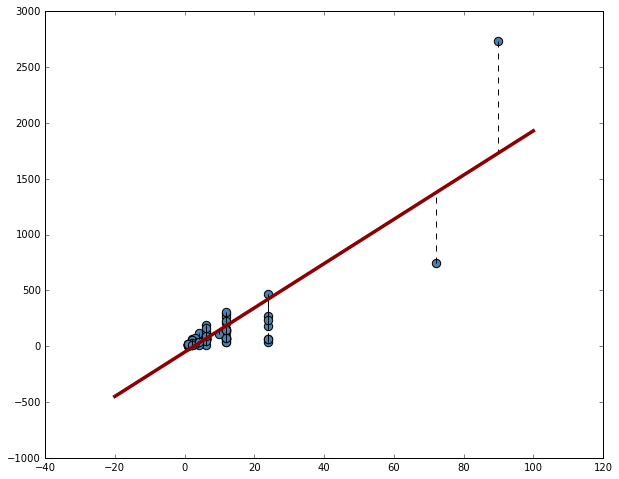

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:         Sale (Dollars)   Pseudo R-squared:               0.3657
Model:                       QuantReg   Bandwidth:                       23.79
Method:                 Least Squares   Sparsity:                        61.82
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:14:36   Df Residuals:                       98
                                        Df Model:                            1
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const            4.4509      3.744      1.189      0.237        -2.978    11.880
Bottles Sold    10.2882      0.256     40.239      0.000         9.781    10.796


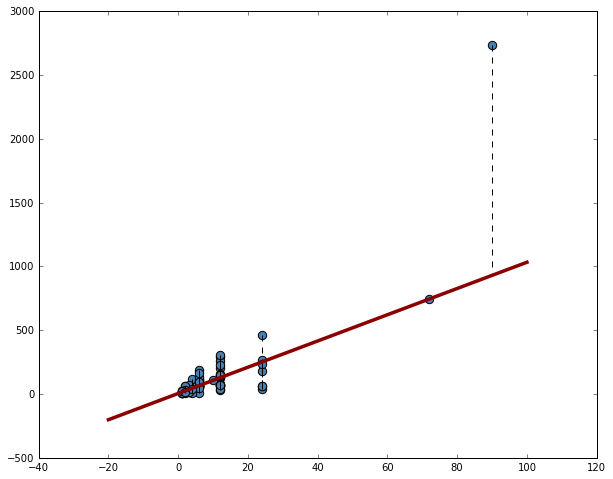

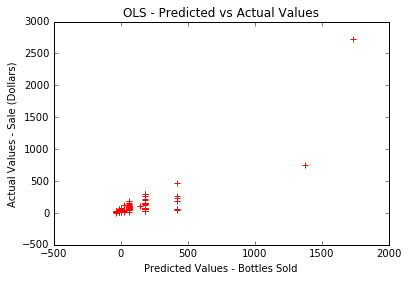

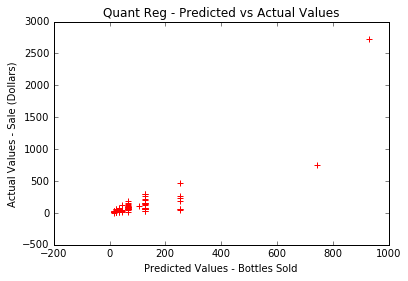

                             OLS Regression Results                             
Dep. Variable:     Volume Sold (Liters)   R-squared:                       0.039
Model:                              OLS   Adj. R-squared:                  0.029
Method:                   Least Squares   F-statistic:                     3.989
Date:                  Sun, 26 Jun 2016   Prob (F-statistic):             0.0486
Time:                          22:14:37   Log-Likelihood:                -420.69
No. Observations:                   100   AIC:                             845.4
Df Residuals:                        98   BIC:                             850.6
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const             

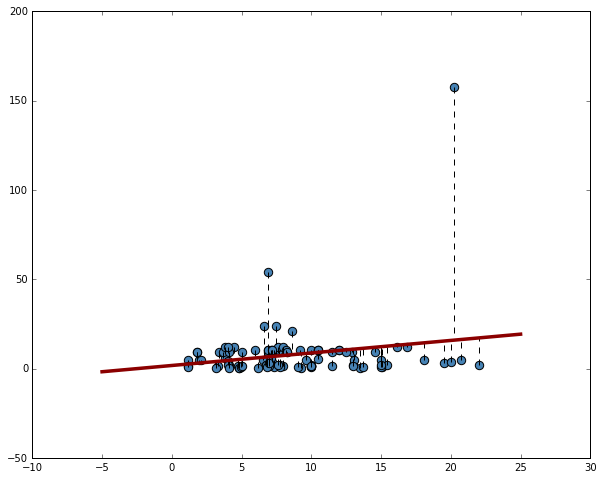

-----------------------------------------------------------
                          QuantReg Regression Results                           
Dep. Variable:     Volume Sold (Liters)   Pseudo R-squared:           -9.332e-09
Model:                         QuantReg   Bandwidth:                       7.407
Method:                   Least Squares   Sparsity:                        15.29
Date:                  Sun, 26 Jun 2016   No. Observations:                  100
Time:                          22:14:37   Df Residuals:                       98
                                          Df Model:                            1
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                 4.5000      1.618      2.781      0.006         1.289     7.711
State Bottle Cost -3.639e-07      0.164  -2.22e-06      1.000        -0.325     0.325


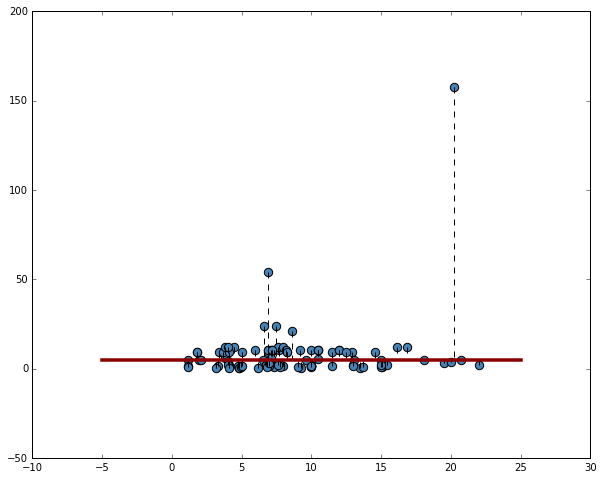

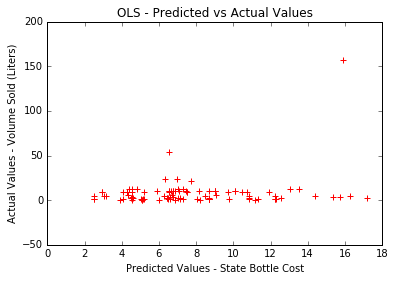

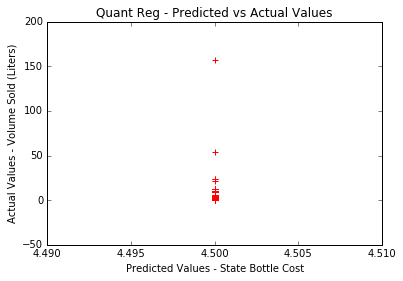

                             OLS Regression Results                             
Dep. Variable:     Volume Sold (Liters)   R-squared:                       0.039
Model:                              OLS   Adj. R-squared:                  0.029
Method:                   Least Squares   F-statistic:                     3.985
Date:                  Sun, 26 Jun 2016   Prob (F-statistic):             0.0487
Time:                          22:14:38   Log-Likelihood:                -420.69
No. Observations:                   100   AIC:                             845.4
Df Residuals:                        98   BIC:                             850.6
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const         

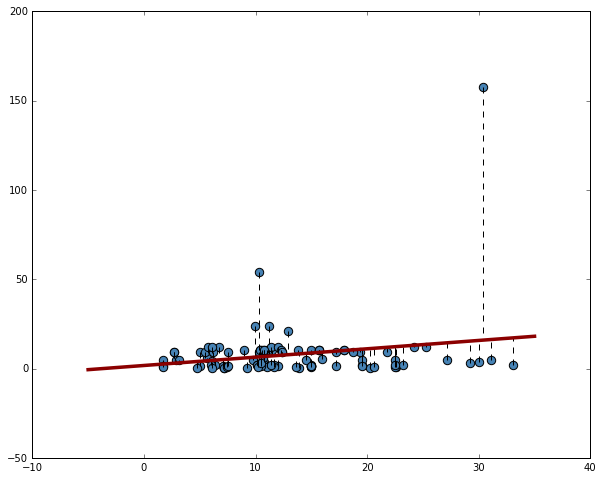

-----------------------------------------------------------
                          QuantReg Regression Results                           
Dep. Variable:     Volume Sold (Liters)   Pseudo R-squared:           -8.327e-09
Model:                         QuantReg   Bandwidth:                       7.407
Method:                   Least Squares   Sparsity:                        15.29
Date:                  Sun, 26 Jun 2016   No. Observations:                  100
Time:                          22:14:39   Df Residuals:                       98
                                          Df Model:                            1
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                   4.5000      1.619      2.780      0.007         1.288     7.712
State Bottle Retail -2.159e-07      0.109  -1.98e-06      1.000        -0.217     0.217


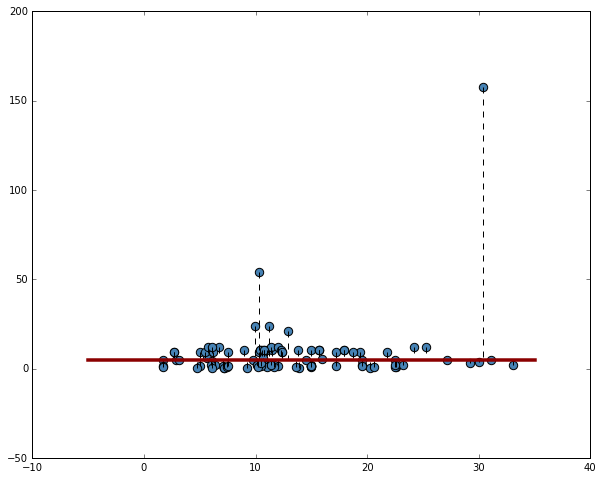

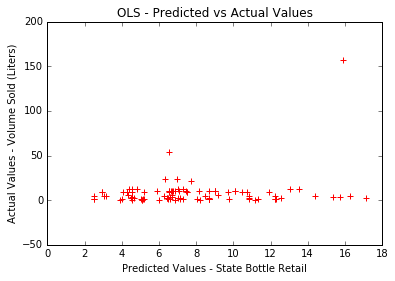

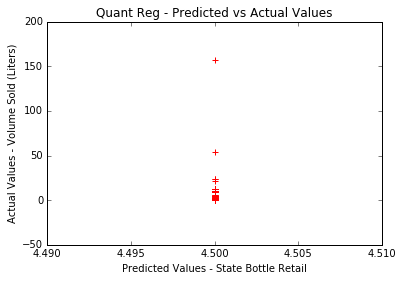

                             OLS Regression Results                             
Dep. Variable:     Volume Sold (Liters)   R-squared:                       0.771
Model:                              OLS   Adj. R-squared:                  0.769
Method:                   Least Squares   F-statistic:                     330.3
Date:                  Sun, 26 Jun 2016   Prob (F-statistic):           3.77e-33
Time:                          22:14:40   Log-Likelihood:                -348.94
No. Observations:                   100   AIC:                             701.9
Df Residuals:                        98   BIC:                             707.1
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           -2.1325     

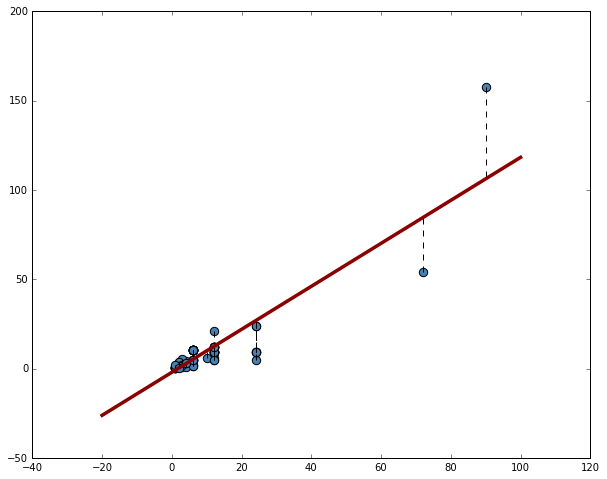

-----------------------------------------------------------
                          QuantReg Regression Results                           
Dep. Variable:     Volume Sold (Liters)   Pseudo R-squared:               0.4706
Model:                         QuantReg   Bandwidth:                       2.469
Method:                   Least Squares   Sparsity:                        5.721
Date:                  Sun, 26 Jun 2016   No. Observations:                  100
Time:                          22:14:40   Df Residuals:                       98
                                          Df Model:                            1
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const        -1.025e-06      0.346  -2.96e-06      1.000        -0.687     0.687
Bottles Sold     0.7500      0.024     31.698      0.000         0.703     0.797


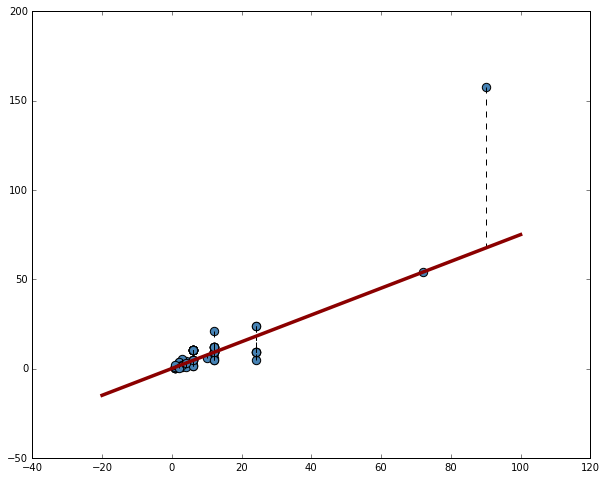

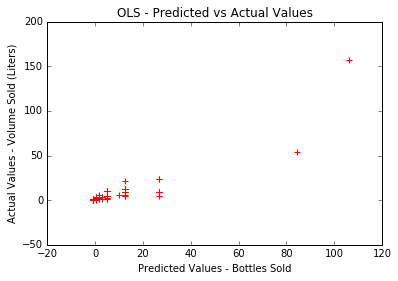

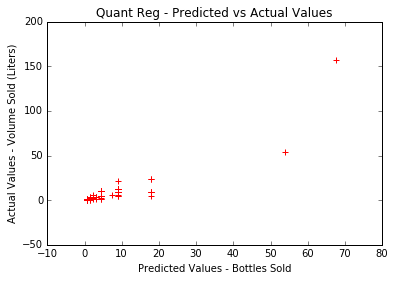

                             OLS Regression Results                             
Dep. Variable:     Volume Sold (Liters)   R-squared:                       0.936
Model:                              OLS   Adj. R-squared:                  0.935
Method:                   Least Squares   F-statistic:                     1436.
Date:                  Sun, 26 Jun 2016   Prob (F-statistic):           2.43e-60
Time:                          22:14:41   Log-Likelihood:                -285.15
No. Observations:                   100   AIC:                             574.3
Df Residuals:                        98   BIC:                             579.5
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const              1.548

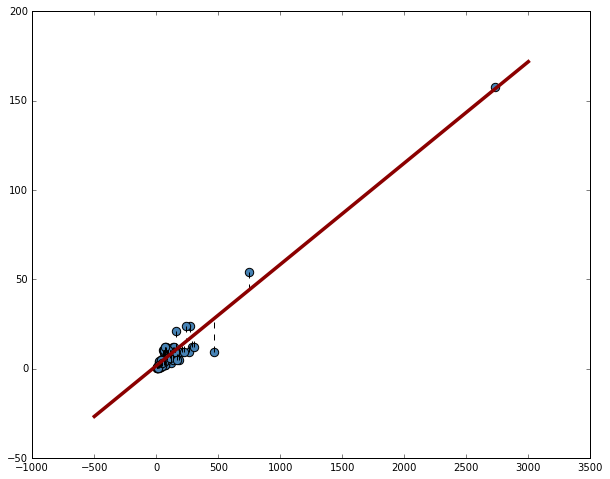

-----------------------------------------------------------
                          QuantReg Regression Results                           
Dep. Variable:     Volume Sold (Liters)   Pseudo R-squared:               0.5081
Model:                         QuantReg   Bandwidth:                       4.354
Method:                   Least Squares   Sparsity:                        10.05
Date:                  Sun, 26 Jun 2016   No. Observations:                  100
Time:                          22:14:41   Df Residuals:                       98
                                          Df Model:                            1
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const              0.4841      0.539      0.898      0.372        -0.586     1.555
Sale (Dollars)     0.0574      0.002     32.292      0.000         0.054     0.061


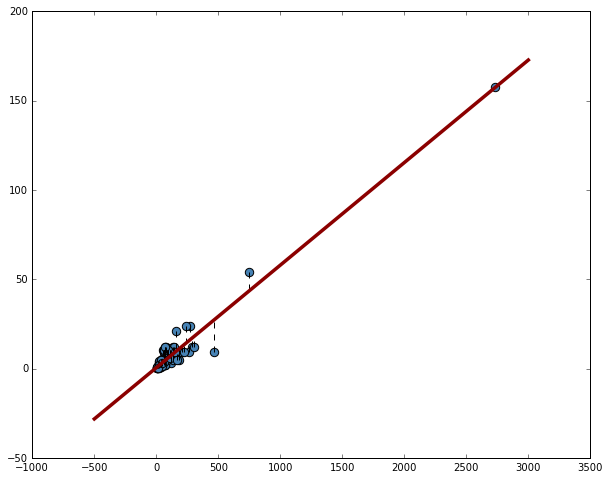

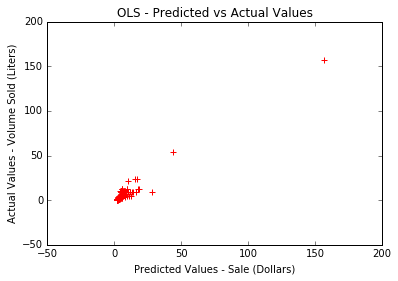

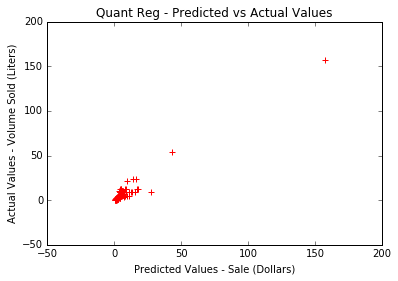

                              OLS Regression Results                             
Dep. Variable:     Volume Sold (Gallons)   R-squared:                       0.039
Model:                               OLS   Adj. R-squared:                  0.029
Method:                    Least Squares   F-statistic:                     3.986
Date:                   Sun, 26 Jun 2016   Prob (F-statistic):             0.0487
Time:                           22:14:42   Log-Likelihood:                -287.58
No. Observations:                    100   AIC:                             579.2
Df Residuals:                         98   BIC:                             584.4
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const   

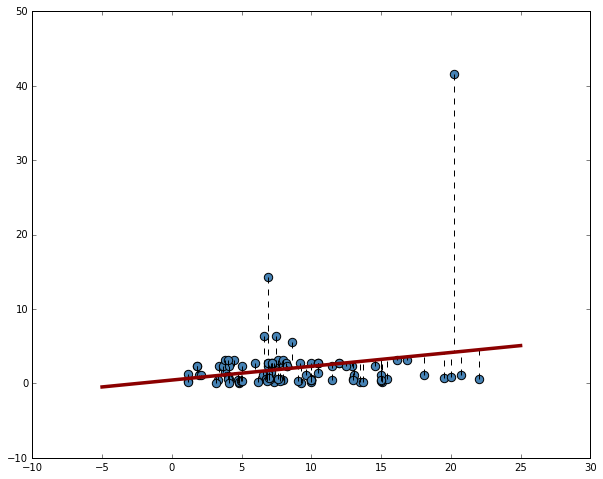

-----------------------------------------------------------
                           QuantReg Regression Results                           
Dep. Variable:     Volume Sold (Gallons)   Pseudo R-squared:           -3.295e-08
Model:                          QuantReg   Bandwidth:                       1.950
Method:                    Least Squares   Sparsity:                        4.034
Date:                   Sun, 26 Jun 2016   No. Observations:                  100
Time:                           22:14:43   Df Residuals:                       98
                                           Df Model:                            1
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                 1.1900      0.427      2.788      0.006         0.343     2.037
State Bottle Cost -3.394e-07      0.043  -7.86e-06      1.000        -0.086     0.086


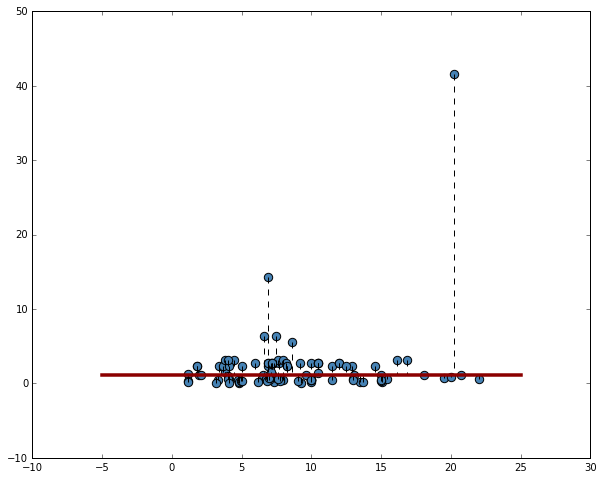

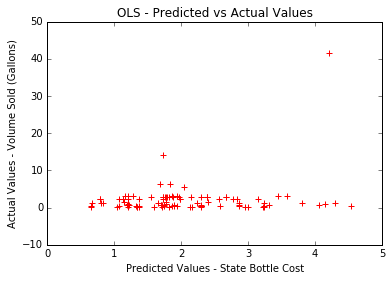

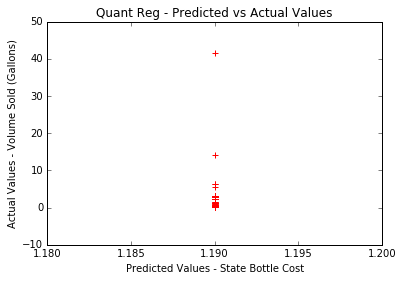

                              OLS Regression Results                             
Dep. Variable:     Volume Sold (Gallons)   R-squared:                       0.039
Model:                               OLS   Adj. R-squared:                  0.029
Method:                    Least Squares   F-statistic:                     3.982
Date:                   Sun, 26 Jun 2016   Prob (F-statistic):             0.0488
Time:                           22:14:44   Log-Likelihood:                -287.58
No. Observations:                    100   AIC:                             579.2
Df Residuals:                         98   BIC:                             584.4
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
cons

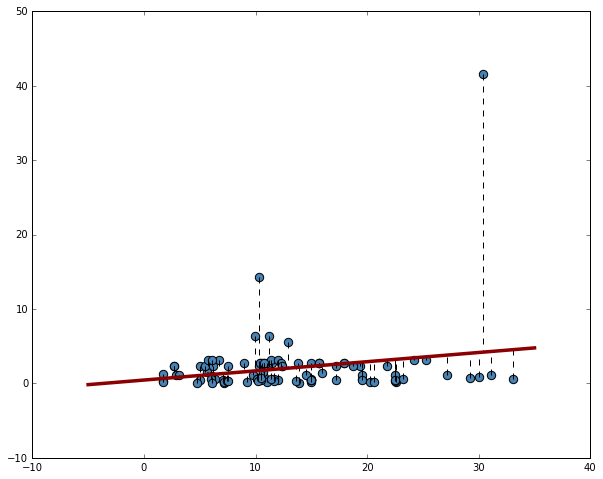

-----------------------------------------------------------
                           QuantReg Regression Results                           
Dep. Variable:     Volume Sold (Gallons)   Pseudo R-squared:           -3.356e-08
Model:                          QuantReg   Bandwidth:                       1.950
Method:                    Least Squares   Sparsity:                        4.034
Date:                   Sun, 26 Jun 2016   No. Observations:                  100
Time:                           22:14:44   Df Residuals:                       98
                                           Df Model:                            1
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                   1.1900      0.427      2.787      0.006         0.343     2.037
State Bottle Retail -2.299e-07      0.029  -7.99e-06      1.000        -0.057     0.057


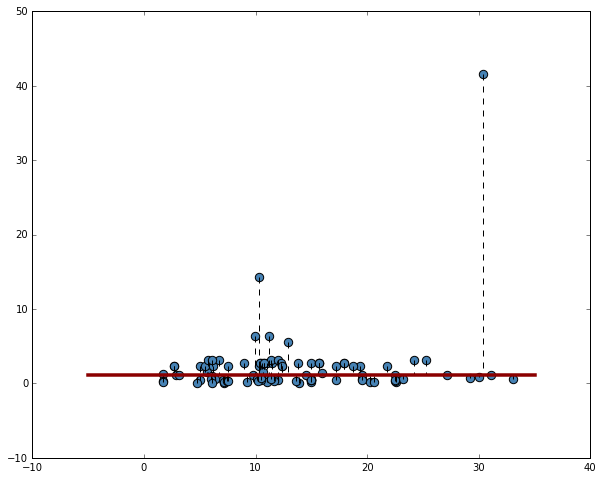

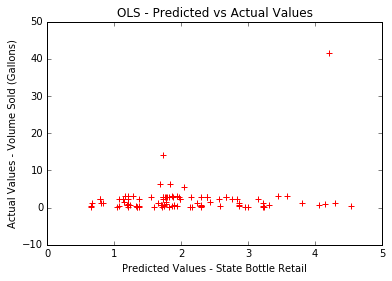

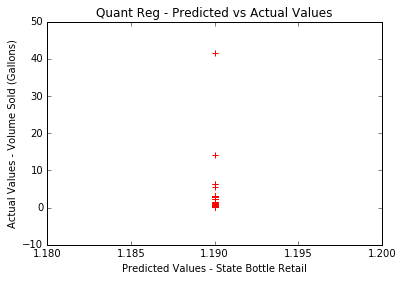

                              OLS Regression Results                             
Dep. Variable:     Volume Sold (Gallons)   R-squared:                       0.771
Model:                               OLS   Adj. R-squared:                  0.769
Method:                    Least Squares   F-statistic:                     330.7
Date:                   Sun, 26 Jun 2016   Prob (F-statistic):           3.59e-33
Time:                           22:14:45   Log-Likelihood:                -215.79
No. Observations:                    100   AIC:                             435.6
Df Residuals:                         98   BIC:                             440.8
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           -0

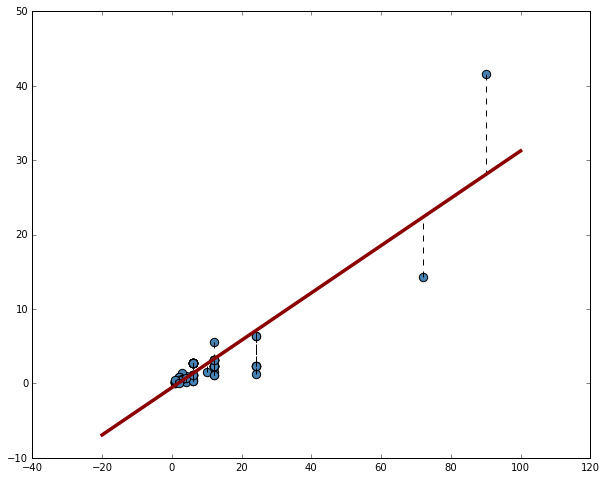

-----------------------------------------------------------
                           QuantReg Regression Results                           
Dep. Variable:     Volume Sold (Gallons)   Pseudo R-squared:               0.4708
Model:                          QuantReg   Bandwidth:                      0.6555
Method:                    Least Squares   Sparsity:                        1.518
Date:                   Sun, 26 Jun 2016   No. Observations:                  100
Time:                           22:14:45   Df Residuals:                       98
                                           Df Model:                            1
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const            0.0020      0.092      0.022      0.983        -0.180     0.184
Bottles Sold     0.1982      0.006     31.574      0.000         0.186     0.211


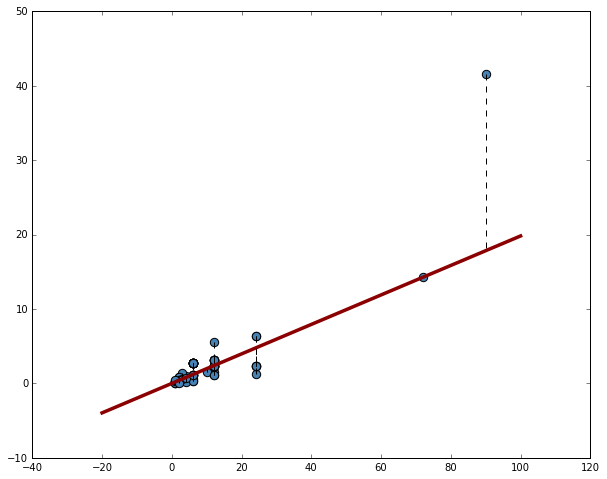

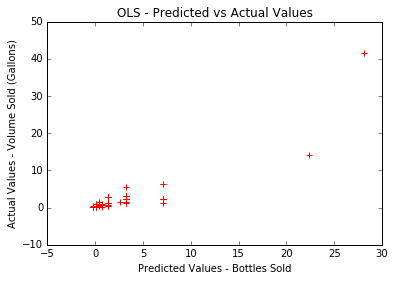

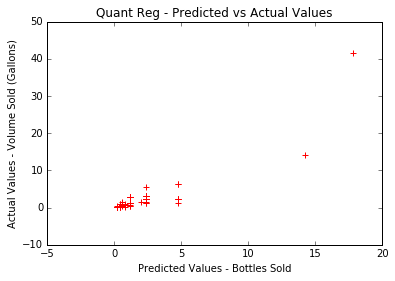

                              OLS Regression Results                             
Dep. Variable:     Volume Sold (Gallons)   R-squared:                       0.936
Model:                               OLS   Adj. R-squared:                  0.936
Method:                    Least Squares   F-statistic:                     1438.
Date:                   Sun, 26 Jun 2016   Prob (F-statistic):           2.28e-60
Time:                           22:14:46   Log-Likelihood:                -151.98
No. Observations:                    100   AIC:                             308.0
Df Residuals:                         98   BIC:                             313.2
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const         

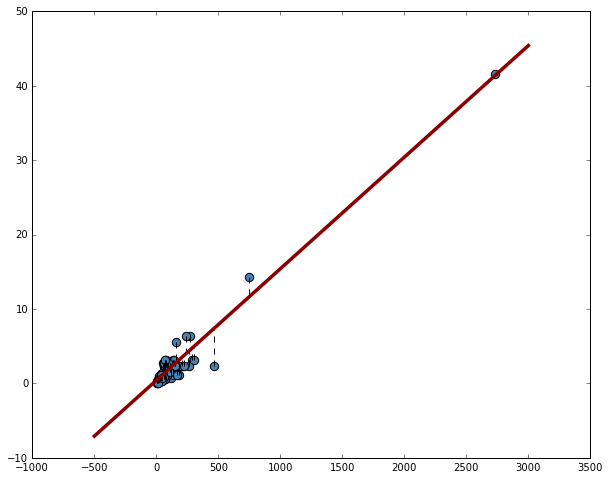

-----------------------------------------------------------
                           QuantReg Regression Results                           
Dep. Variable:     Volume Sold (Gallons)   Pseudo R-squared:               0.5086
Model:                          QuantReg   Bandwidth:                       1.149
Method:                    Least Squares   Sparsity:                        2.652
Date:                   Sun, 26 Jun 2016   No. Observations:                  100
Time:                           22:14:47   Df Residuals:                       98
                                           Df Model:                            1
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const              0.1260      0.142      0.885      0.378        -0.156     0.409
Sale (Dollars)     0.0152      0.000     32.325      0.000         0.014     0.016


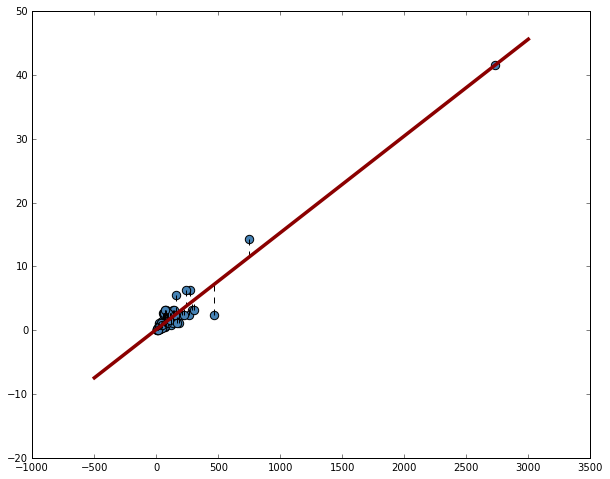

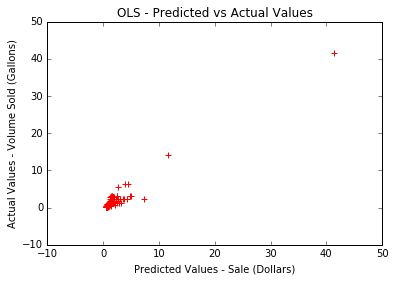

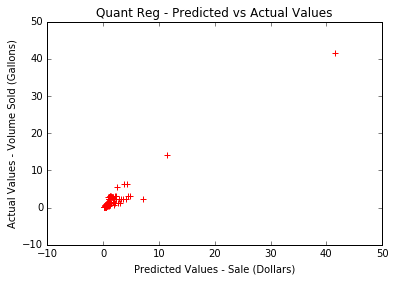

                              OLS Regression Results                             
Dep. Variable:     Volume Sold (Gallons)   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 1.945e+08
Date:                   Sun, 26 Jun 2016   Prob (F-statistic):          2.09e-310
Time:                           22:14:48   Log-Likelihood:                 435.47
No. Observations:                    100   AIC:                            -866.9
Df Residuals:                         98   BIC:                            -861.7
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
co

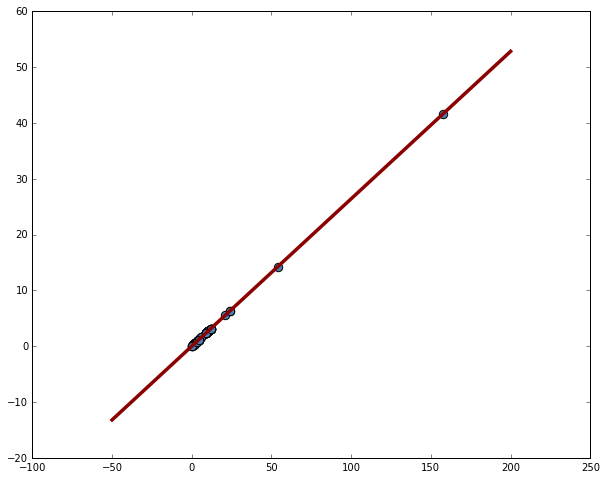

-----------------------------------------------------------
                           QuantReg Regression Results                           
Dep. Variable:     Volume Sold (Gallons)   Pseudo R-squared:               0.9983
Model:                          QuantReg   Bandwidth:                    0.005175
Method:                    Least Squares   Sparsity:                      0.01080
Date:                   Sun, 26 Jun 2016   No. Observations:                  100
Time:                           22:14:48   Df Residuals:                       98
                                           Df Model:                            1
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                   -0.0003      0.001     -0.501      0.617        -0.001     0.001
Volume Sold (Liters)     0.2642   3.26e-05   8110.877      0.000         0.264     0.264


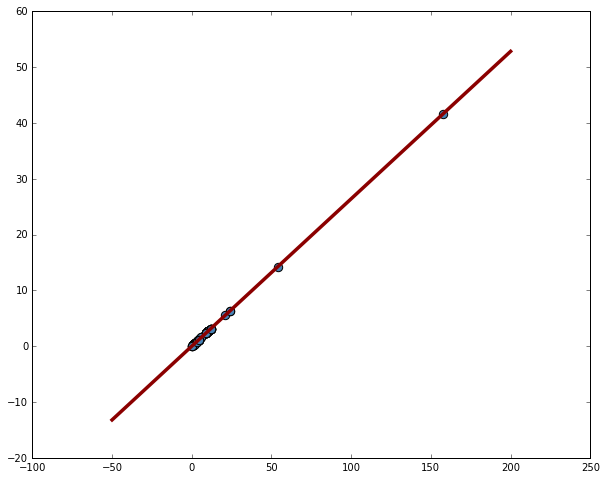

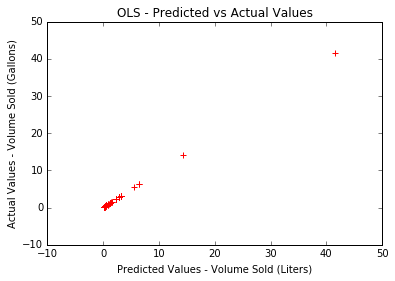

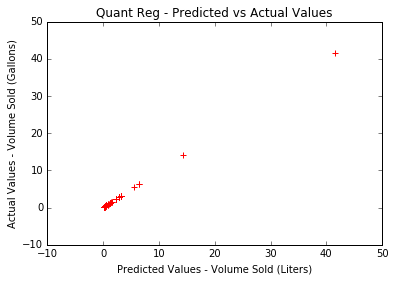

                            OLS Regression Results                            
Dep. Variable:        Price Per Liter   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     56.18
Date:                Sun, 26 Jun 2016   Prob (F-statistic):           2.98e-11
Time:                        22:14:49   Log-Likelihood:                -352.42
No. Observations:                 100   AIC:                             708.8
Df Residuals:                      98   BIC:                             714.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                 5.2276      1.75

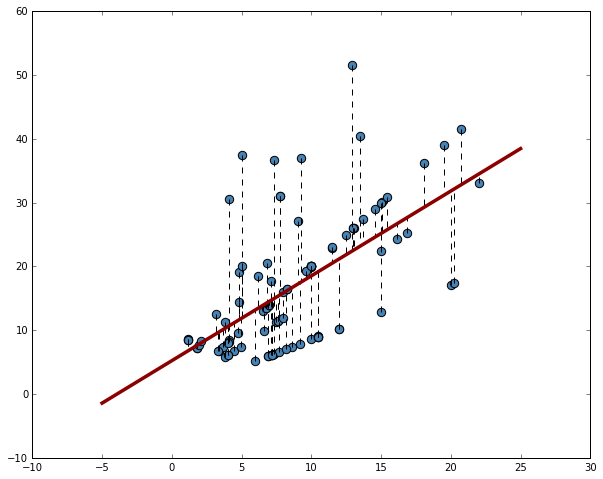

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:        Price Per Liter   Pseudo R-squared:               0.3021
Model:                       QuantReg   Bandwidth:                       5.816
Method:                 Least Squares   Sparsity:                        15.19
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:14:50   Df Residuals:                       98
                                        Df Model:                            1
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                 0.0206      1.607      0.013      0.990        -3.168     3.209
State Bottle Cost     1.9979      0.163     12.293      0.000         1.675     2.320


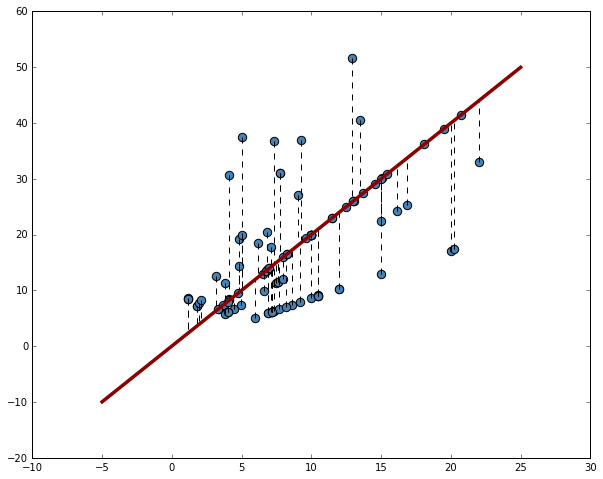

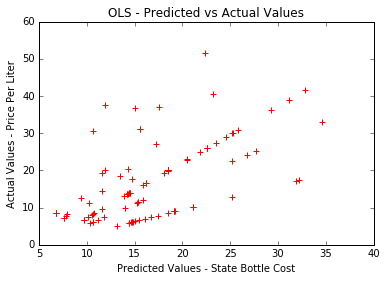

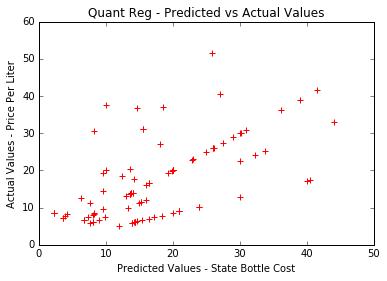

                            OLS Regression Results                            
Dep. Variable:        Price Per Liter   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sun, 26 Jun 2016   Prob (F-statistic):           3.11e-11
Time:                        22:14:50   Log-Likelihood:                -352.46
No. Observations:                 100   AIC:                             708.9
Df Residuals:                      98   BIC:                             714.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                   5.2286    

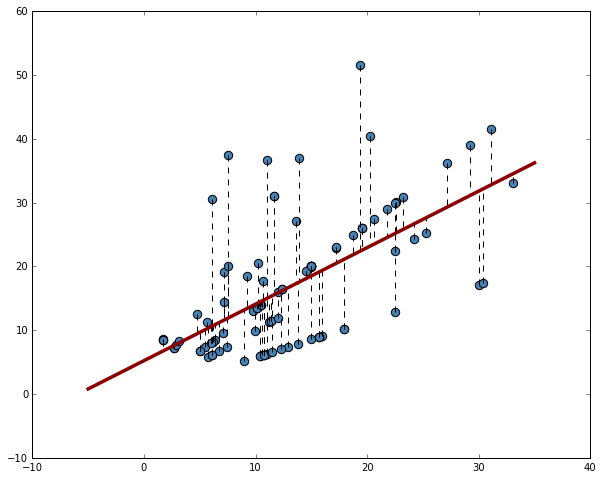

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:        Price Per Liter   Pseudo R-squared:               0.3021
Model:                       QuantReg   Bandwidth:                       5.756
Method:                 Least Squares   Sparsity:                        15.07
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:14:51   Df Residuals:                       98
                                        Df Model:                            1
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                 6.03e-06      1.595   3.78e-06      1.000        -3.165     3.165
State Bottle Retail     1.3333      0.108     12.400      0.000         1.120     1.547


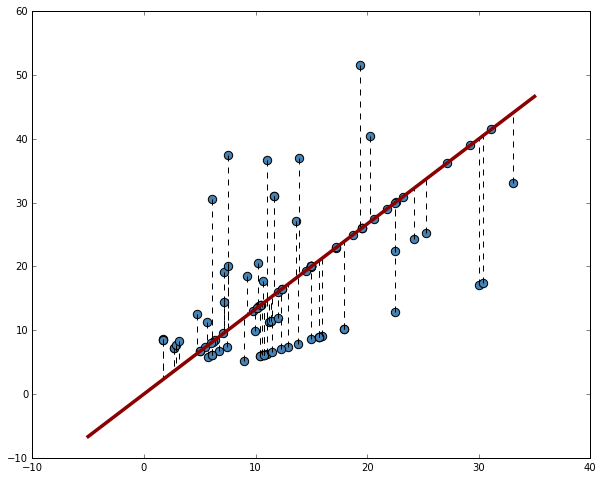

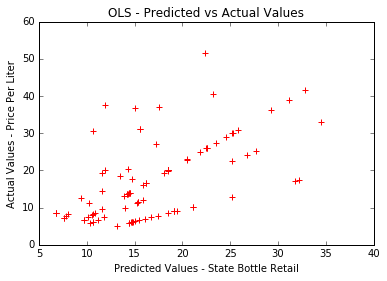

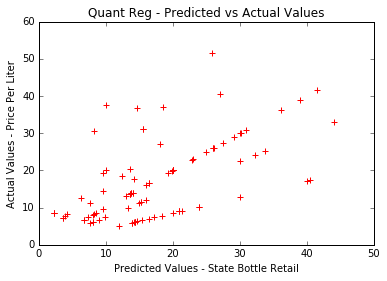

                            OLS Regression Results                            
Dep. Variable:        Price Per Liter   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8061
Date:                Sun, 26 Jun 2016   Prob (F-statistic):              0.371
Time:                        22:14:52   Log-Likelihood:                -374.67
No. Observations:                 100   AIC:                             753.3
Df Residuals:                      98   BIC:                             758.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           17.4538      1.255     13.912   

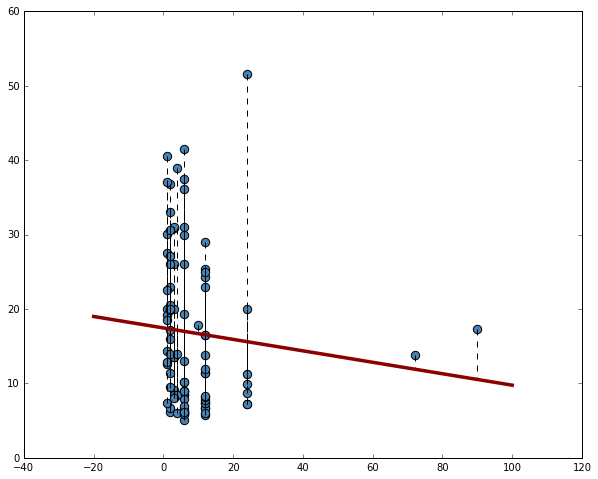

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:        Price Per Liter   Pseudo R-squared:            1.888e-05
Model:                       QuantReg   Bandwidth:                       11.36
Method:                 Least Squares   Sparsity:                        26.05
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:14:52   Df Residuals:                       98
                                        Df Model:                            1
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           13.6609      1.577      8.661      0.000        10.531    16.791
Bottles Sold     0.0019      0.108      0.018      0.986        -0.212     0.216


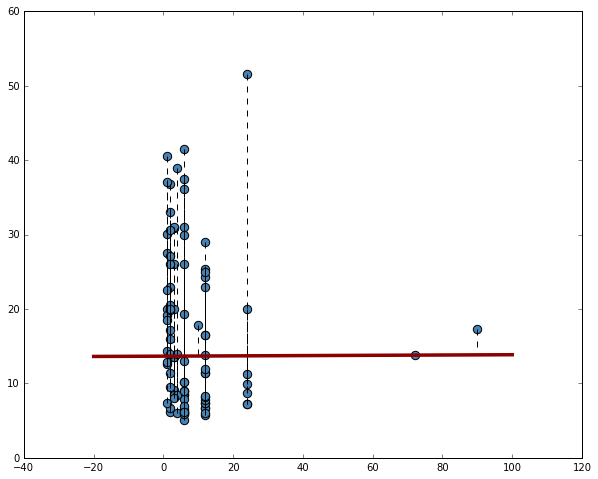

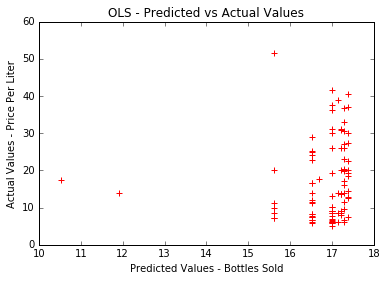

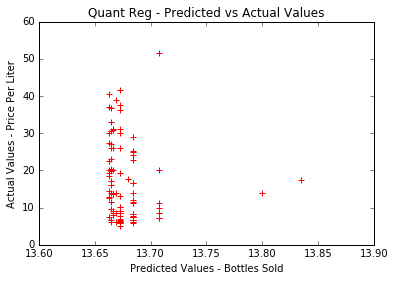

                            OLS Regression Results                            
Dep. Variable:        Price Per Liter   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.5657
Date:                Sun, 26 Jun 2016   Prob (F-statistic):              0.454
Time:                        22:14:53   Log-Likelihood:                -374.79
No. Observations:                 100   AIC:                             753.6
Df Residuals:                      98   BIC:                             758.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             16.5137      1.113     14.

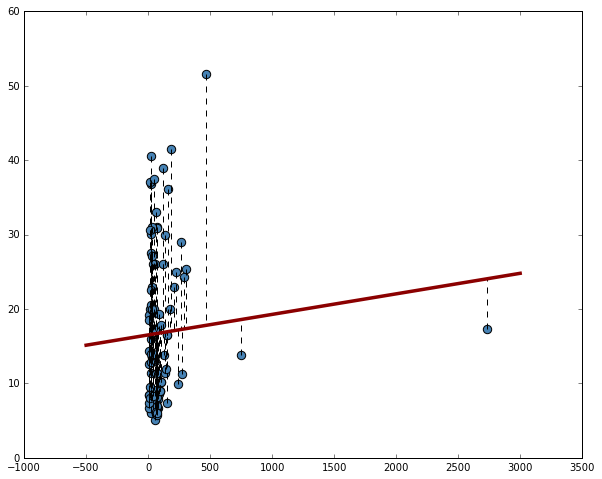

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:        Price Per Liter   Pseudo R-squared:             0.005469
Model:                       QuantReg   Bandwidth:                       11.36
Method:                 Least Squares   Sparsity:                        25.90
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:14:54   Df Residuals:                       98
                                        Df Model:                            1
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             13.5037      1.390      9.712      0.000        10.744    16.263
Sale (Dollars)     0.0014      0.005      0.308      0.759        -0.008     0.011


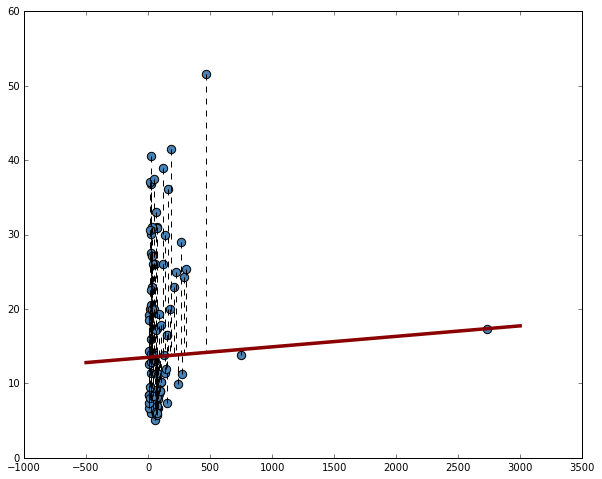

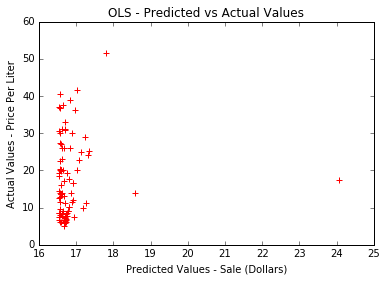

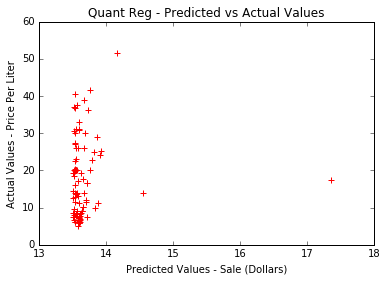

                            OLS Regression Results                            
Dep. Variable:        Price Per Liter   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.513
Date:                Sun, 26 Jun 2016   Prob (F-statistic):              0.222
Time:                        22:14:54   Log-Likelihood:                -374.31
No. Observations:                 100   AIC:                             752.6
Df Residuals:                      98   BIC:                             757.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                   17.4168 

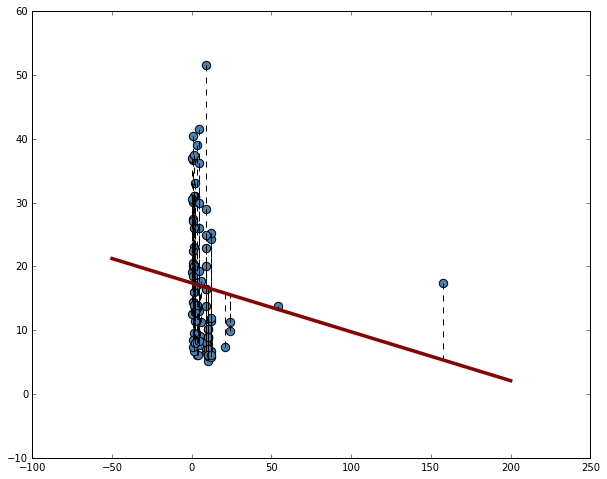

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:        Price Per Liter   Pseudo R-squared:             0.002925
Model:                       QuantReg   Bandwidth:                       11.36
Method:                 Least Squares   Sparsity:                        25.72
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:14:55   Df Residuals:                       98
                                        Df Model:                            1
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                   14.1833      1.422      9.977      0.000        11.362    17.004
Volume Sold (Liters)    -0.1222      0.078     -1.575      0.118        -0.276     0.032


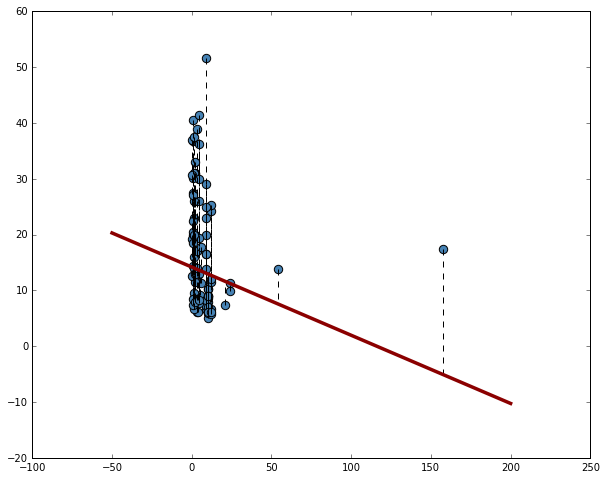

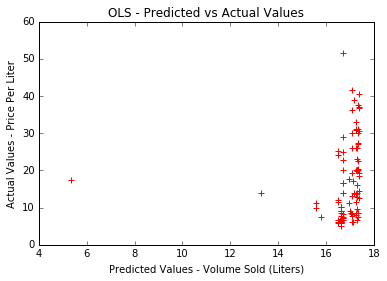

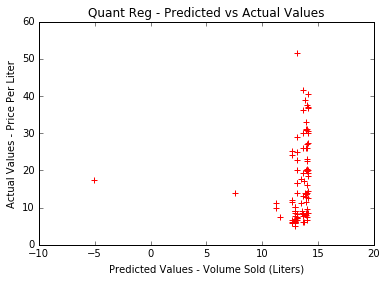

                            OLS Regression Results                            
Dep. Variable:        Price Per Liter   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.509
Date:                Sun, 26 Jun 2016   Prob (F-statistic):              0.222
Time:                        22:14:56   Log-Likelihood:                -374.31
No. Observations:                 100   AIC:                             752.6
Df Residuals:                      98   BIC:                             757.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
const                    17.41

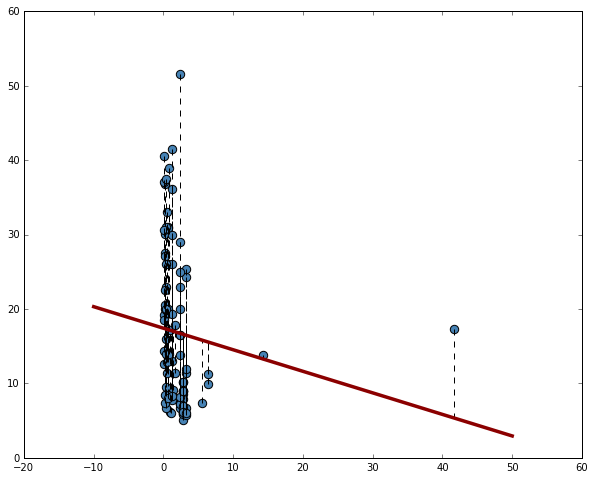

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:        Price Per Liter   Pseudo R-squared:             0.002872
Model:                       QuantReg   Bandwidth:                       11.36
Method:                 Least Squares   Sparsity:                        25.72
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:14:56   Df Residuals:                       98
                                        Df Model:                            1
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
const                    14.1852      1.422      9.978      0.000        11.364    17.006
Volume Sold (Gallons)    -0.4630      0.294     -1.576      0.118        -1.046     0.120


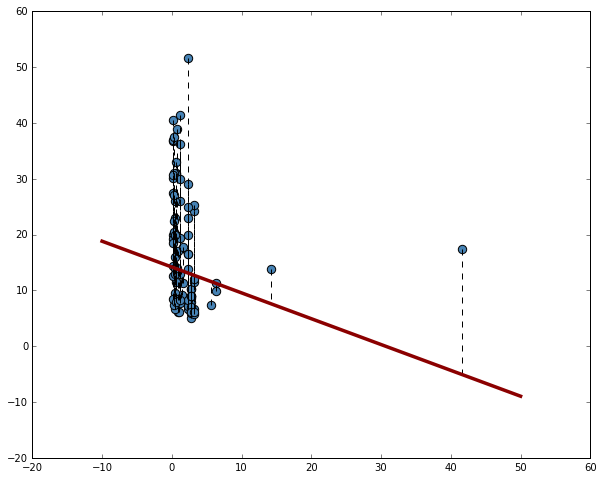

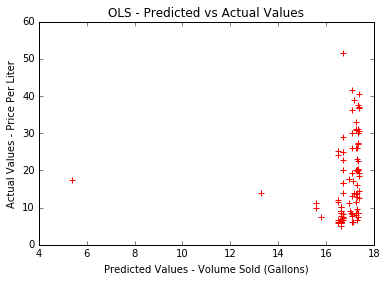

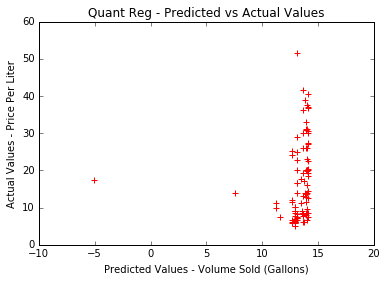

                            OLS Regression Results                            
Dep. Variable:                 Margin   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.572e+05
Date:                Sun, 26 Jun 2016   Prob (F-statistic):          8.23e-186
Time:                        22:14:57   Log-Likelihood:                 205.59
No. Observations:                 100   AIC:                            -407.2
Df Residuals:                      98   BIC:                            -402.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                 0.0084      0.00

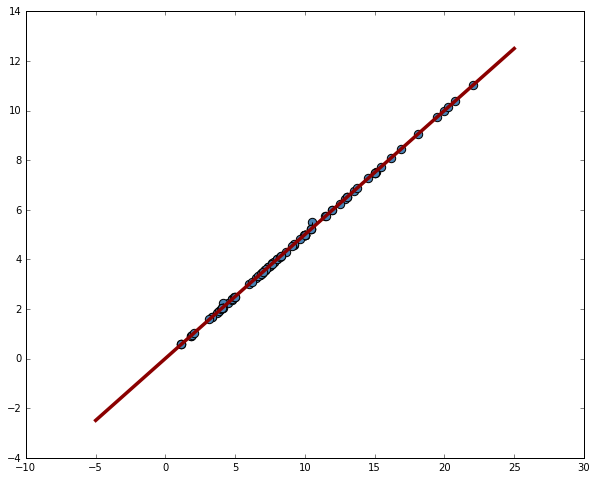

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:                 Margin   Pseudo R-squared:               0.9963
Model:                       QuantReg   Bandwidth:                    0.004115
Method:                 Least Squares   Sparsity:                      0.01016
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:14:58   Df Residuals:                       98
                                        Df Model:                            1
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const              8.089e-06      0.001      0.008      0.994        -0.002     0.002
State Bottle Cost     0.5000      0.000   4598.684      0.000         0.500     0.500


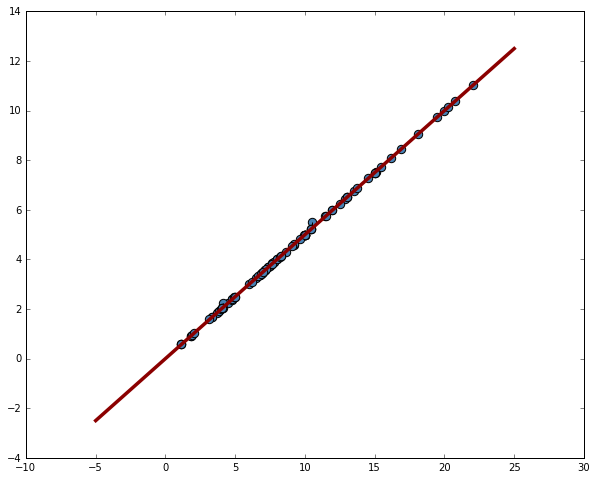

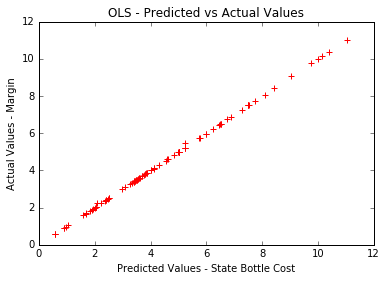

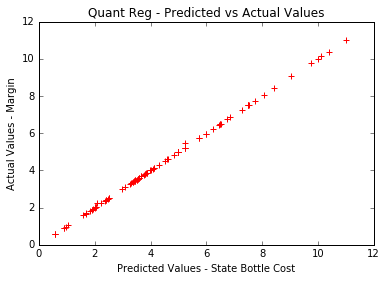

                            OLS Regression Results                            
Dep. Variable:                 Margin   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.254e+06
Date:                Sun, 26 Jun 2016   Prob (F-statistic):          4.61e-203
Time:                        22:14:58   Log-Likelihood:                 246.12
No. Observations:                 100   AIC:                            -488.2
Df Residuals:                      98   BIC:                            -483.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                   0.0055    

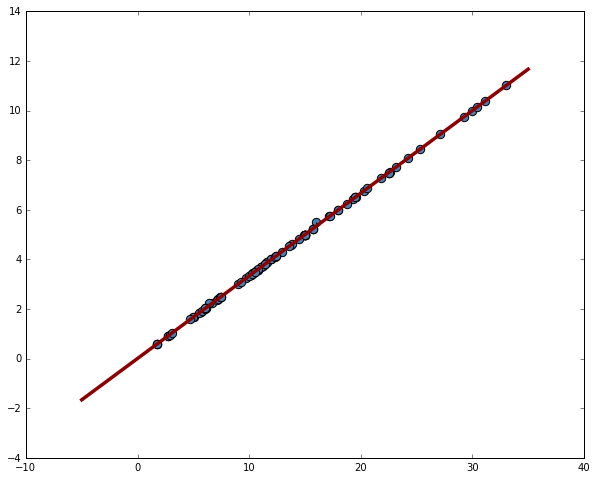

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:                 Margin   Pseudo R-squared:               0.9975
Model:                       QuantReg   Bandwidth:                    0.002743
Method:                 Least Squares   Sparsity:                     0.006773
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:14:59   Df Residuals:                       98
                                        Df Model:                            1
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                7.804e-06      0.001      0.011      0.991        -0.001     0.001
State Bottle Retail     0.3333   4.83e-05   6897.164      0.000         0.333     0.333


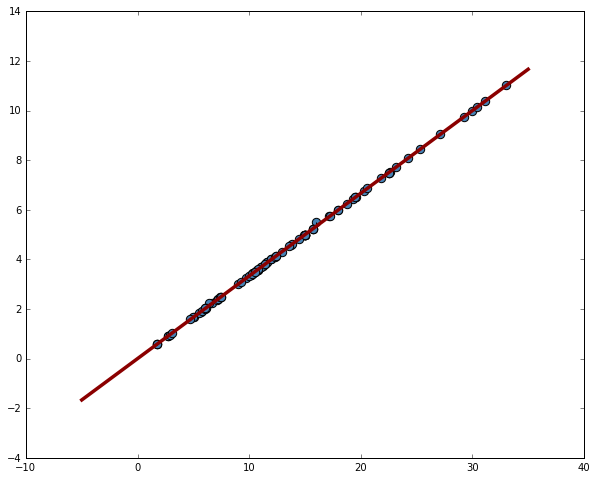

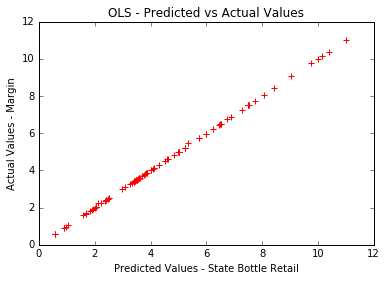

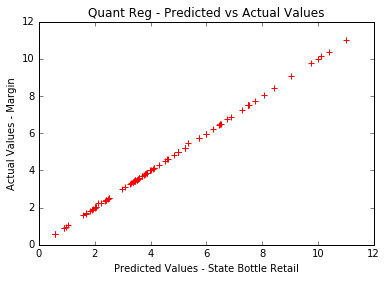

                            OLS Regression Results                            
Dep. Variable:                 Margin   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.07208
Date:                Sun, 26 Jun 2016   Prob (F-statistic):              0.789
Time:                        22:15:00   Log-Likelihood:                -226.67
No. Observations:                 100   AIC:                             457.3
Df Residuals:                      98   BIC:                             462.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const            4.3197      0.286     15.125   

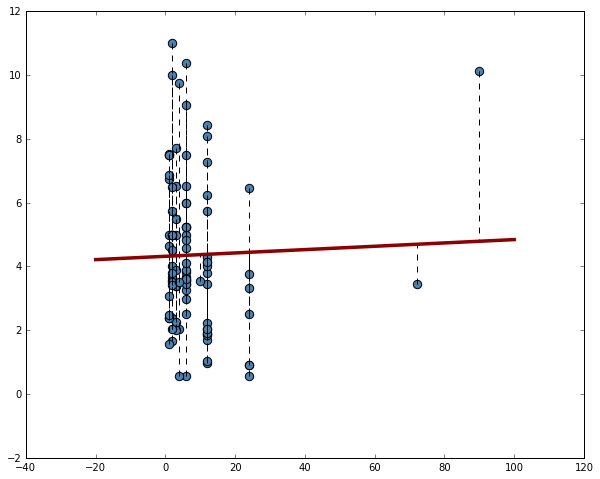

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:                 Margin   Pseudo R-squared:             0.003460
Model:                       QuantReg   Bandwidth:                       2.434
Method:                 Least Squares   Sparsity:                        5.915
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:15:00   Df Residuals:                       98
                                        Df Model:                            1
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const            3.8987      0.358     10.885      0.000         3.188     4.609
Bottles Sold    -0.0062      0.024     -0.255      0.799        -0.055     0.042


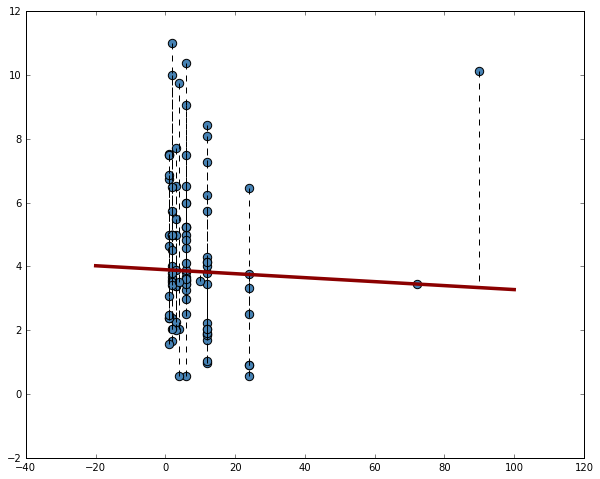

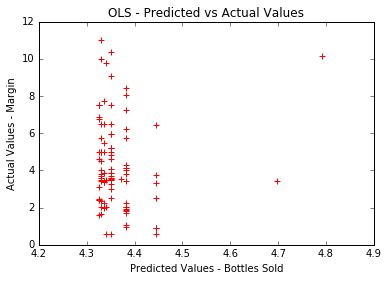

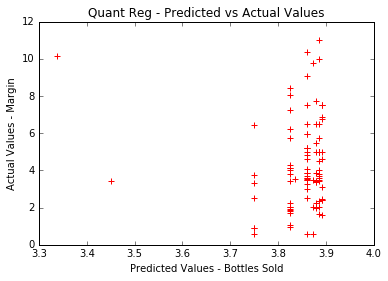

                            OLS Regression Results                            
Dep. Variable:                 Margin   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     11.21
Date:                Sun, 26 Jun 2016   Prob (F-statistic):            0.00116
Time:                        22:15:01   Log-Likelihood:                -221.29
No. Observations:                 100   AIC:                             446.6
Df Residuals:                      98   BIC:                             451.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const              4.0708      0.240     16.

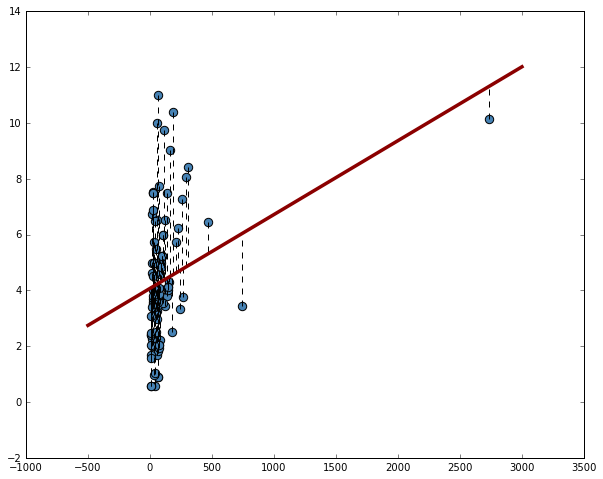

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:                 Margin   Pseudo R-squared:              0.05333
Model:                       QuantReg   Bandwidth:                       2.202
Method:                 Least Squares   Sparsity:                        5.577
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:15:02   Df Residuals:                       98
                                        Df Model:                            1
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const              3.6592      0.299     12.223      0.000         3.065     4.253
Sale (Dollars)     0.0024      0.001      2.398      0.018         0.000     0.004


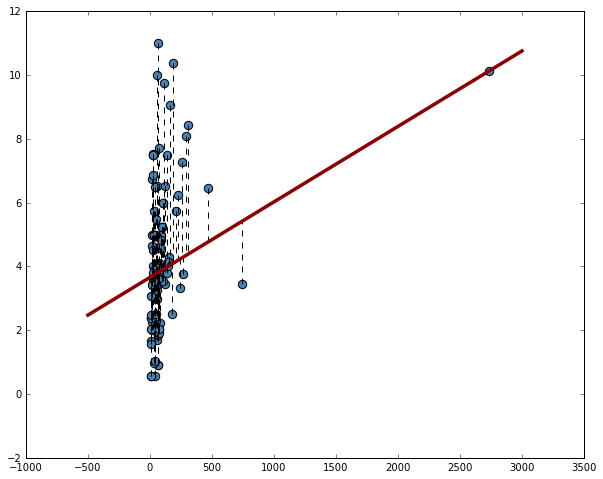

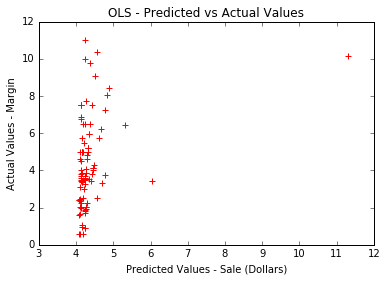

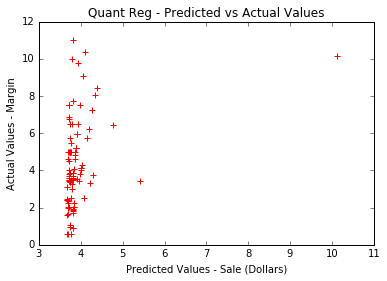

                            OLS Regression Results                            
Dep. Variable:                 Margin   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     3.977
Date:                Sun, 26 Jun 2016   Prob (F-statistic):             0.0489
Time:                        22:15:03   Log-Likelihood:                -224.72
No. Observations:                 100   AIC:                             453.4
Df Residuals:                      98   BIC:                             458.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                    4.1456 

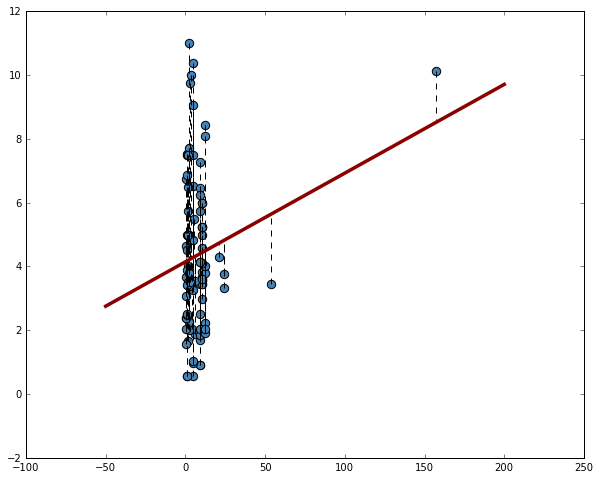

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:                 Margin   Pseudo R-squared:              0.01157
Model:                       QuantReg   Bandwidth:                       2.191
Method:                 Least Squares   Sparsity:                        5.716
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:15:03   Df Residuals:                       98
                                        Df Model:                            1
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                    3.4414      0.316     10.892      0.000         2.814     4.068
Volume Sold (Liters)     0.0425      0.017      2.463      0.016         0.008     0.077


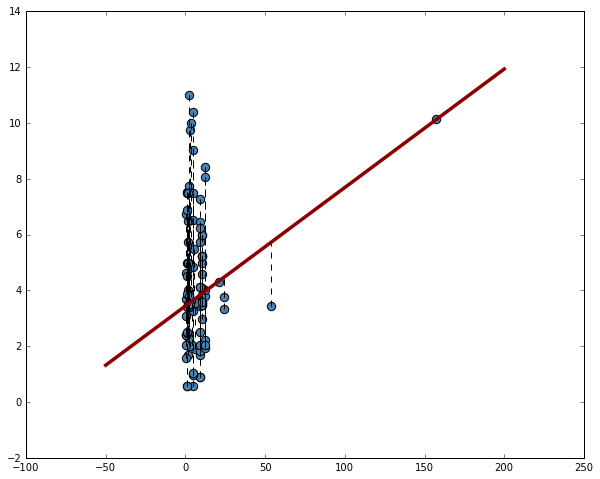

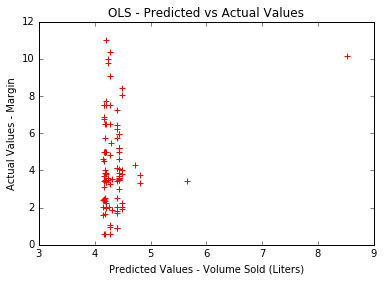

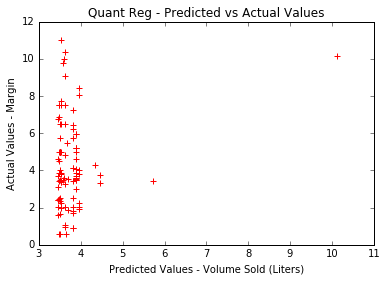

                            OLS Regression Results                            
Dep. Variable:                 Margin   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     3.974
Date:                Sun, 26 Jun 2016   Prob (F-statistic):             0.0490
Time:                        22:15:04   Log-Likelihood:                -224.72
No. Observations:                 100   AIC:                             453.4
Df Residuals:                      98   BIC:                             458.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
const                     4.14

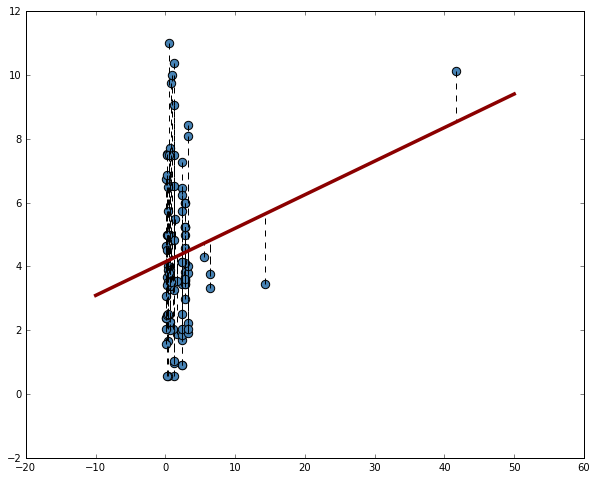

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:                 Margin   Pseudo R-squared:              0.01158
Model:                       QuantReg   Bandwidth:                       2.191
Method:                 Least Squares   Sparsity:                        5.716
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:15:05   Df Residuals:                       98
                                        Df Model:                            1
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
const                     3.4421      0.316     10.894      0.000         2.815     4.069
Volume Sold (Gallons)     0.1607      0.065      2.463      0.016         0.031     0.290


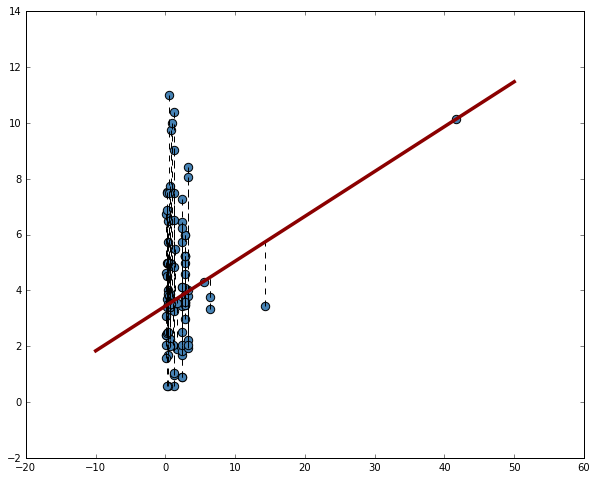

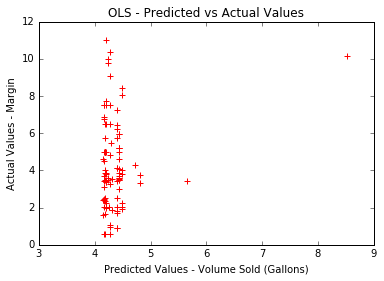

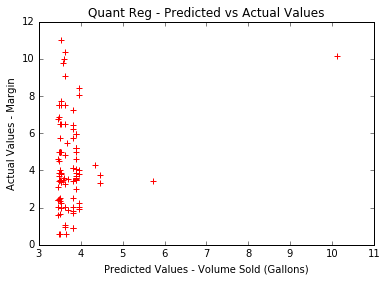

                            OLS Regression Results                            
Dep. Variable:                 Margin   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     55.79
Date:                Sun, 26 Jun 2016   Prob (F-statistic):           3.38e-11
Time:                        22:15:06   Log-Likelihood:                -204.18
No. Observations:                 100   AIC:                             412.4
Df Residuals:                      98   BIC:                             417.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const               2.0656      0.361     

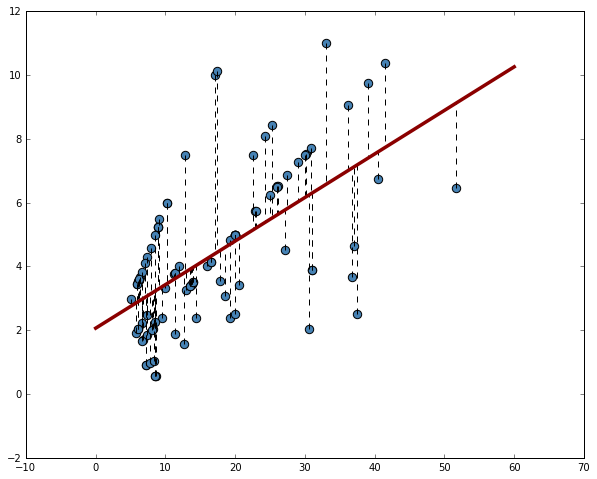

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:                 Margin   Pseudo R-squared:               0.2159
Model:                       QuantReg   Bandwidth:                       1.412
Method:                 Least Squares   Sparsity:                        3.953
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:15:06   Df Residuals:                       98
                                        Df Model:                            1
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const               0.8377      0.379      2.213      0.029         0.087     1.589
Price Per Liter     0.2081      0.019     10.843      0.000         0.170     0.246


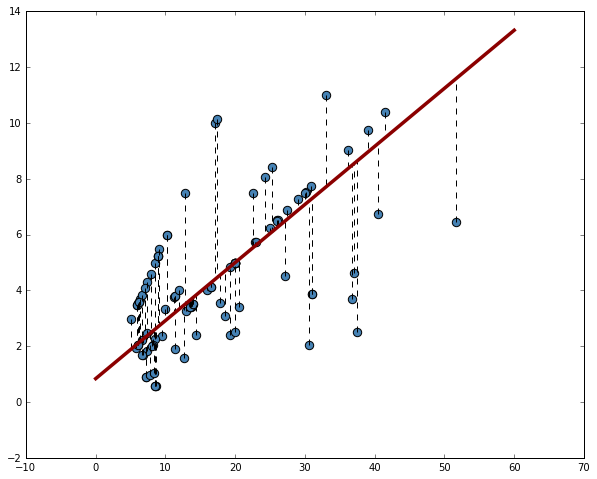

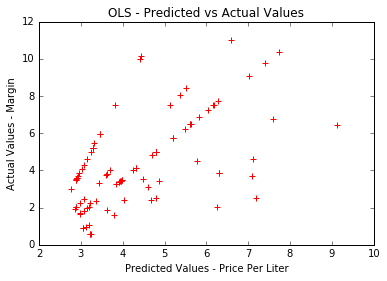

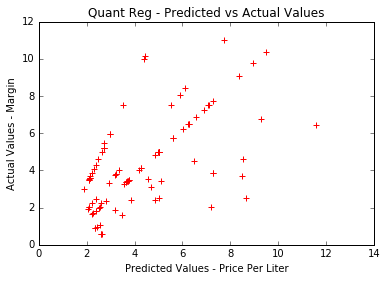

                            OLS Regression Results                            
Dep. Variable:            Sale Margin   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     11.23
Date:                Sun, 26 Jun 2016   Prob (F-statistic):            0.00115
Time:                        22:15:07   Log-Likelihood:                -591.01
No. Observations:                 100   AIC:                             1186.
Df Residuals:                      98   BIC:                             1191.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const               -19.5145     19.07

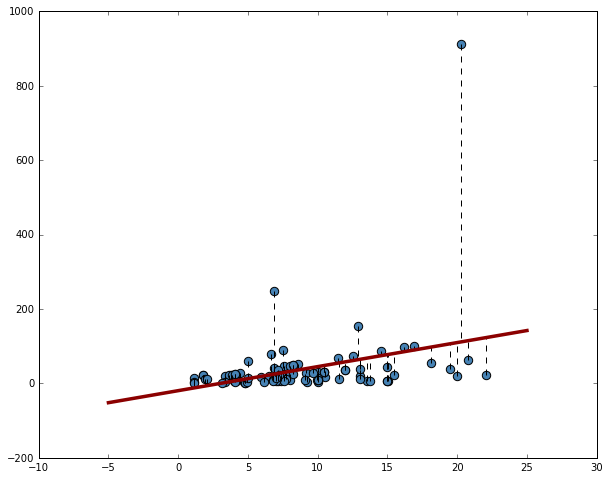

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:            Sale Margin   Pseudo R-squared:              0.02876
Model:                       QuantReg   Bandwidth:                       18.78
Method:                 Least Squares   Sparsity:                        48.68
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:15:08   Df Residuals:                       98
                                        Df Model:                            1
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                 8.1126      5.151      1.575      0.118        -2.109    18.334
State Bottle Cost     1.8277      0.521      3.508      0.001         0.794     2.862


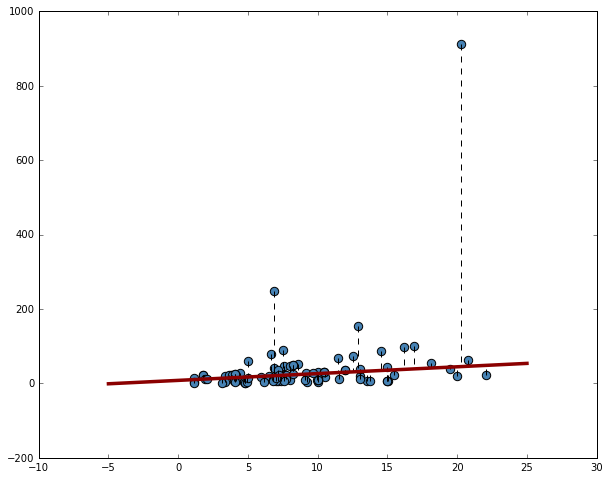

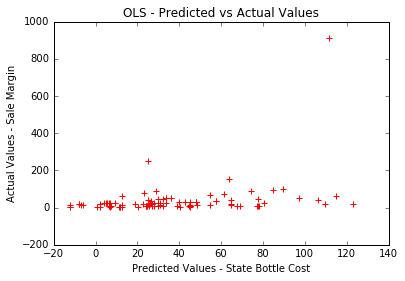

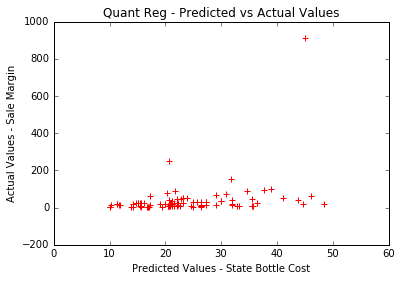

                            OLS Regression Results                            
Dep. Variable:            Sale Margin   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     11.22
Date:                Sun, 26 Jun 2016   Prob (F-statistic):            0.00115
Time:                        22:15:09   Log-Likelihood:                -591.01
No. Observations:                 100   AIC:                             1186.
Df Residuals:                      98   BIC:                             1191.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                 -19.5335    

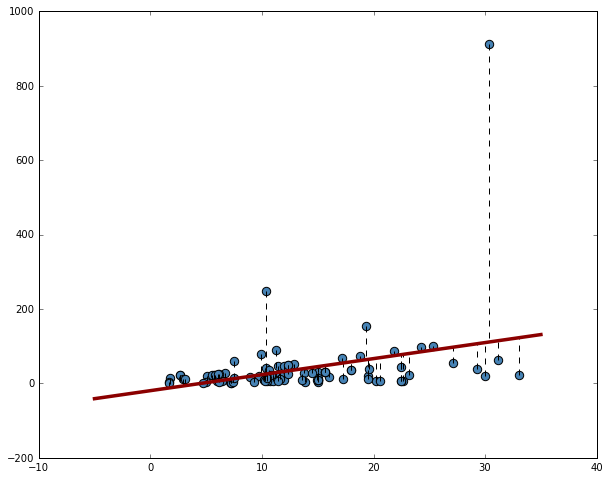

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:            Sale Margin   Pseudo R-squared:              0.02856
Model:                       QuantReg   Bandwidth:                       18.78
Method:                 Least Squares   Sparsity:                        48.72
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:15:09   Df Residuals:                       98
                                        Df Model:                            1
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                   8.1042      5.157      1.572      0.119        -2.130    18.338
State Bottle Retail     1.2193      0.348      3.507      0.001         0.529     1.909


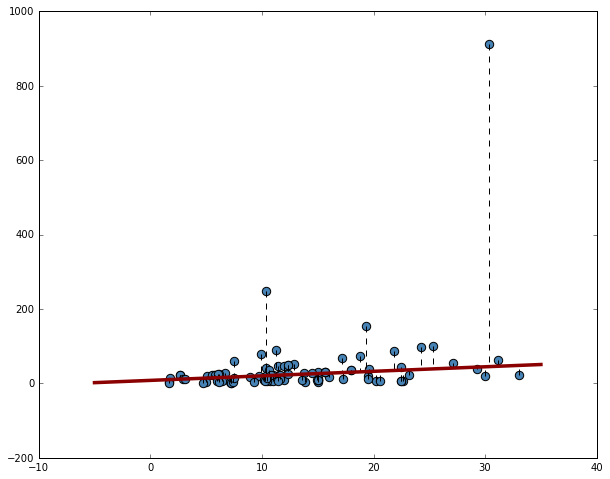

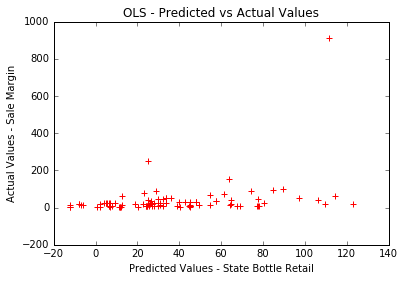

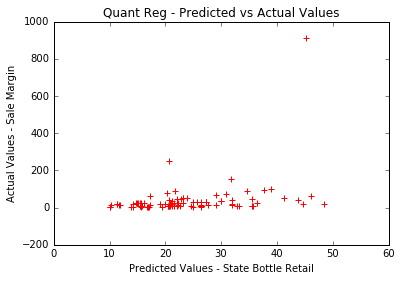

                            OLS Regression Results                            
Dep. Variable:            Sale Margin   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     252.2
Date:                Sun, 26 Jun 2016   Prob (F-statistic):           7.46e-29
Time:                        22:15:10   Log-Likelihood:                -532.75
No. Observations:                 100   AIC:                             1070.
Df Residuals:                      98   BIC:                             1075.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const          -17.8133      6.096     -2.922   

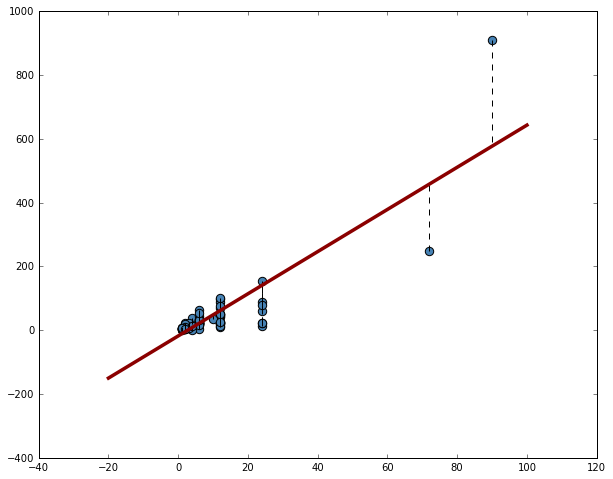

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:            Sale Margin   Pseudo R-squared:               0.3655
Model:                       QuantReg   Bandwidth:                       7.962
Method:                 Least Squares   Sparsity:                        20.65
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:15:11   Df Residuals:                       98
                                        Df Model:                            1
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const            1.5055      1.251      1.204      0.232        -0.976     3.987
Bottles Sold     3.4291      0.085     40.148      0.000         3.260     3.599


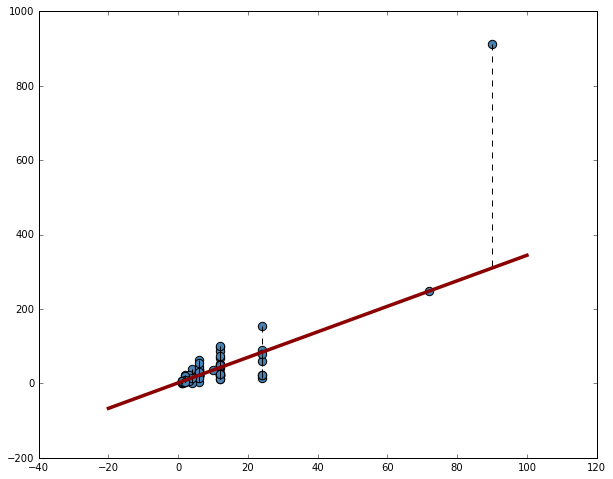

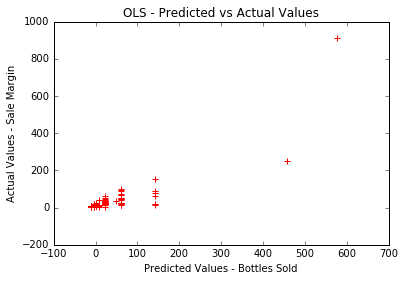

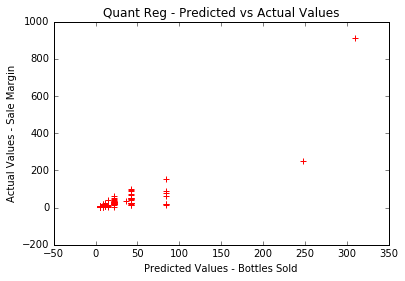

                            OLS Regression Results                            
Dep. Variable:            Sale Margin   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.108e+08
Date:                Sun, 26 Jun 2016   Prob (F-statistic):          4.04e-312
Time:                        22:15:12   Log-Likelihood:                 132.64
No. Observations:                 100   AIC:                            -261.3
Df Residuals:                      98   BIC:                            -256.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const              0.0114      0.007      1.

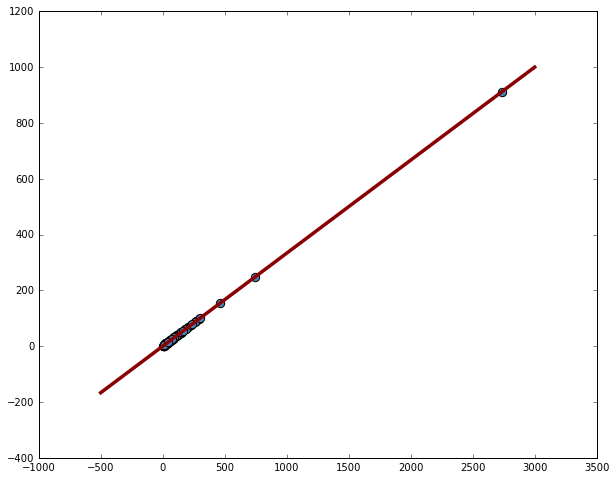

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:            Sale Margin   Pseudo R-squared:               0.9993
Model:                       QuantReg   Bandwidth:                     0.01384
Method:                 Least Squares   Sparsity:                      0.03346
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:15:12   Df Residuals:                       98
                                        Df Model:                            1
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             -0.0011      0.002     -0.616      0.539        -0.005     0.002
Sale (Dollars)     0.3334   5.92e-06   5.63e+04      0.000         0.333     0.333


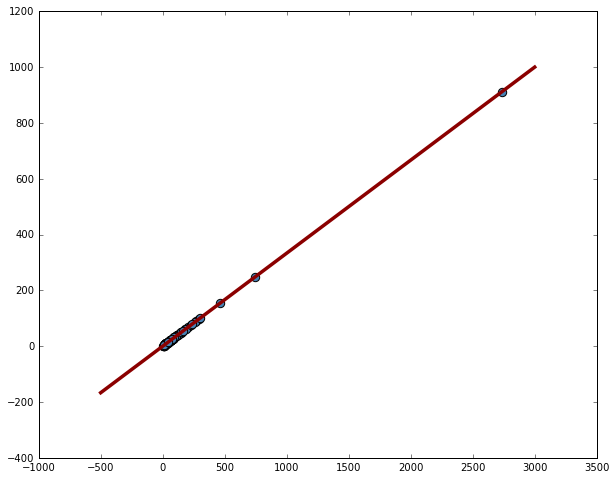

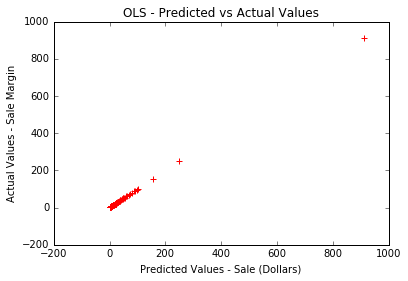

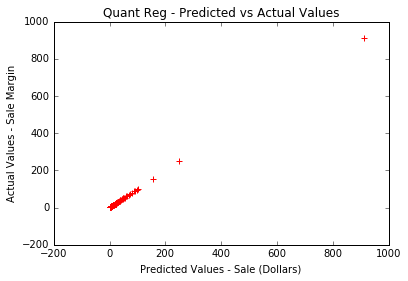

                            OLS Regression Results                            
Dep. Variable:            Sale Margin   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1436.
Date:                Sun, 26 Jun 2016   Prob (F-statistic):           2.39e-60
Time:                        22:15:14   Log-Likelihood:                -458.88
No. Observations:                 100   AIC:                             921.8
Df Residuals:                      98   BIC:                             927.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                   -6.1541 

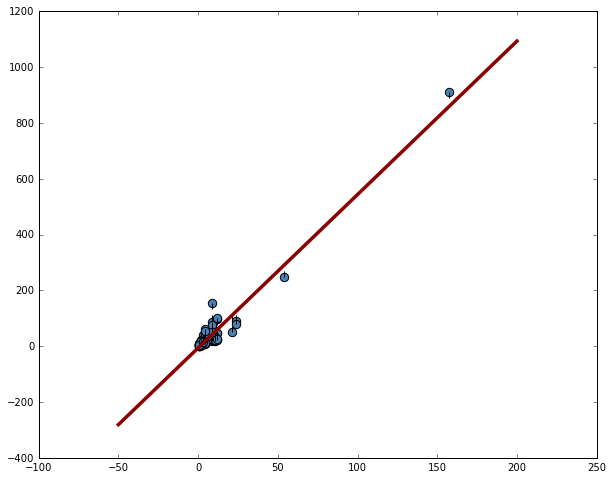

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:            Sale Margin   Pseudo R-squared:               0.4368
Model:                       QuantReg   Bandwidth:                       10.95
Method:                 Least Squares   Sparsity:                        30.67
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:15:14   Df Residuals:                       98
                                        Df Model:                            1
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                    1.4400      1.696      0.849      0.398        -1.925     4.805
Volume Sold (Liters)     3.8800      0.093     41.931      0.000         3.696     4.064


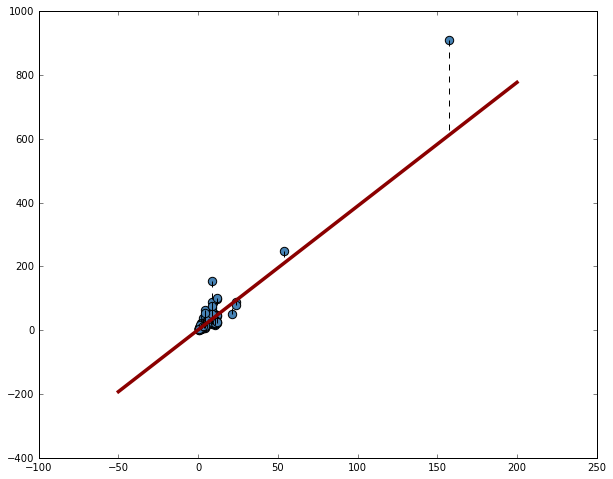

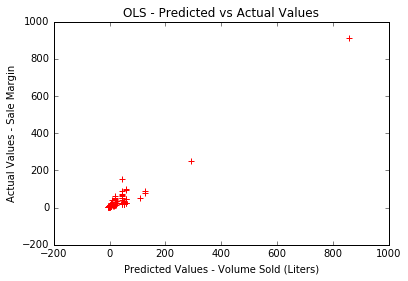

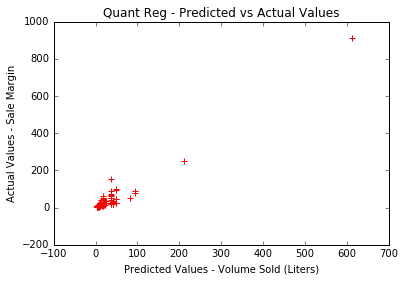

                            OLS Regression Results                            
Dep. Variable:            Sale Margin   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     1438.
Date:                Sun, 26 Jun 2016   Prob (F-statistic):           2.24e-60
Time:                        22:15:15   Log-Likelihood:                -458.82
No. Observations:                 100   AIC:                             921.6
Df Residuals:                      98   BIC:                             926.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
const                    -6.15

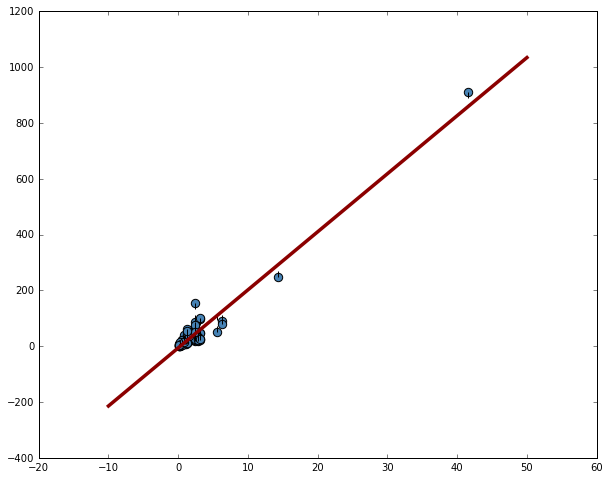

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:            Sale Margin   Pseudo R-squared:               0.4372
Model:                       QuantReg   Bandwidth:                       10.91
Method:                 Least Squares   Sparsity:                        30.55
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:15:16   Df Residuals:                       98
                                        Df Model:                            1
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
const                     1.5190      1.689      0.899      0.371        -1.832     4.870
Volume Sold (Gallons)    14.6628      0.349     42.032      0.000        13.971    15.355


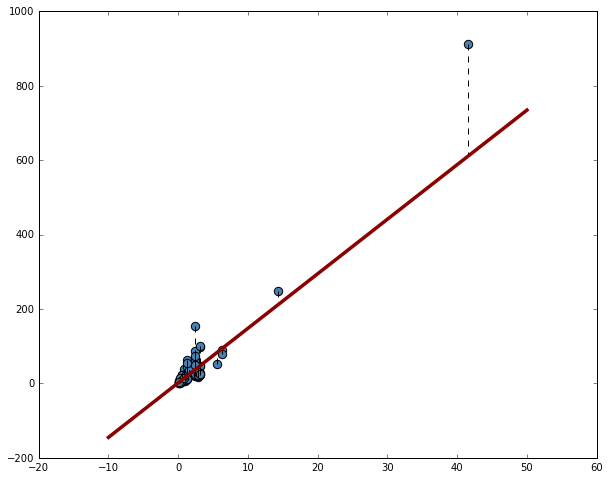

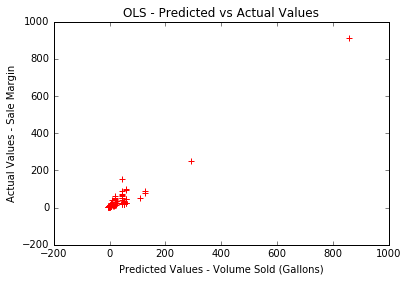

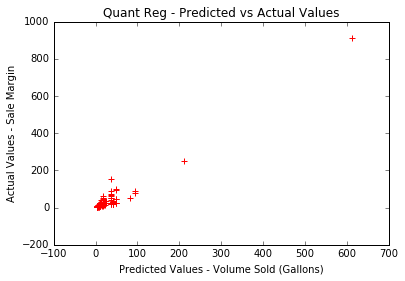

                            OLS Regression Results                            
Dep. Variable:            Sale Margin   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.5638
Date:                Sun, 26 Jun 2016   Prob (F-statistic):              0.455
Time:                        22:15:17   Log-Likelihood:                -596.15
No. Observations:                 100   AIC:                             1196.
Df Residuals:                      98   BIC:                             1202.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              25.1675     18.171     

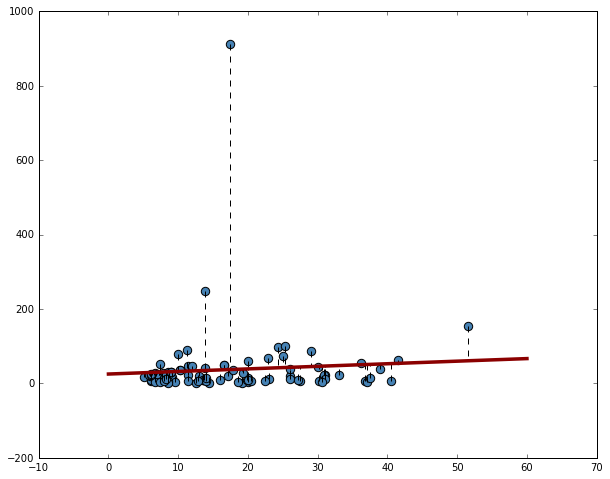

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:            Sale Margin   Pseudo R-squared:             0.001850
Model:                       QuantReg   Bandwidth:                       17.61
Method:                 Least Squares   Sparsity:                        43.85
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:15:17   Df Residuals:                       98
                                        Df Model:                            1
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              22.4448      4.199      5.345      0.000        14.111    30.778
Price Per Liter    -0.1985      0.213     -0.932      0.353        -0.621     0.224


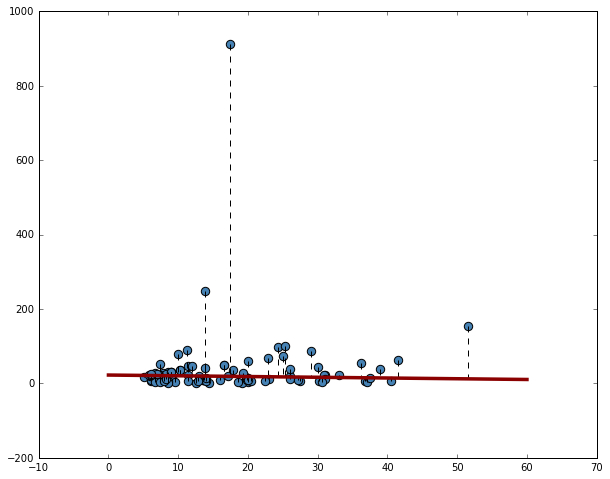

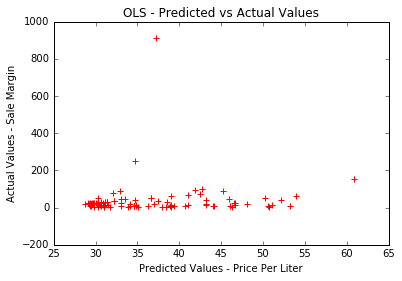

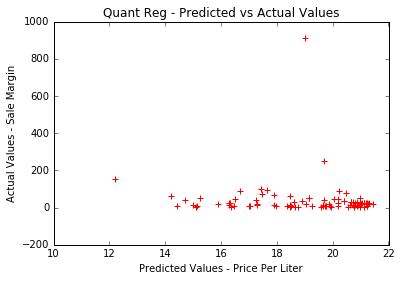

                            OLS Regression Results                            
Dep. Variable:            Sale Margin   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     11.20
Date:                Sun, 26 Jun 2016   Prob (F-statistic):            0.00116
Time:                        22:15:18   Log-Likelihood:                -591.02
No. Observations:                 100   AIC:                             1186.
Df Residuals:                      98   BIC:                             1191.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -19.5649     19.101     -1.024      0.3

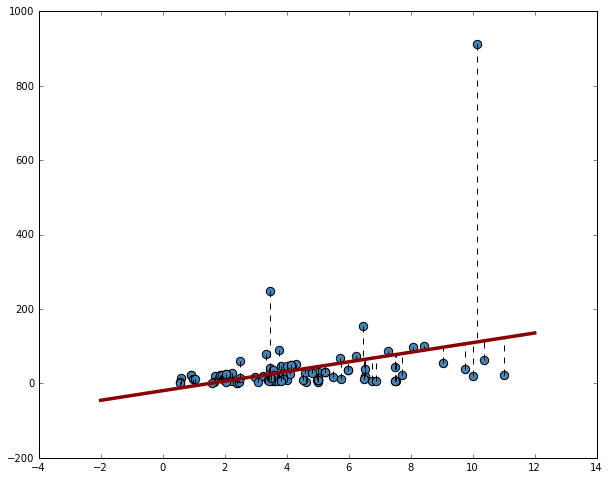

-----------------------------------------------------------
                         QuantReg Regression Results                          
Dep. Variable:            Sale Margin   Pseudo R-squared:              0.02818
Model:                       QuantReg   Bandwidth:                       18.78
Method:                 Least Squares   Sparsity:                        48.79
Date:                Sun, 26 Jun 2016   No. Observations:                  100
Time:                        22:15:19   Df Residuals:                       98
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          8.0872      5.169      1.565      0.121        -2.171    18.345
Margin         3.6626      1.045      3.506      0.001         1.590     5.735


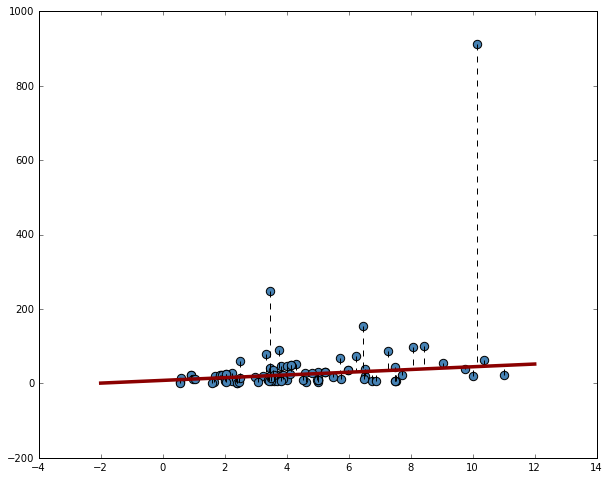

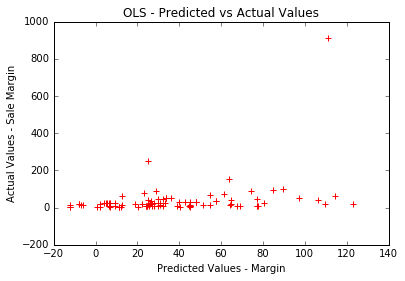

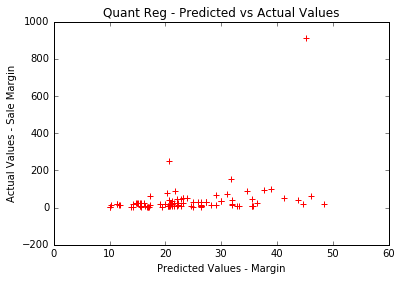

In [15]:
# For each variable in varColList, plot them against the other variables and generate a predictive model
# USING OLS

for varY in varColList:
    varYVals = dfLiquorSales.ix[randIndexes,varY] # Get the Y values (dependant)
    for varx in varColList:
        if varx == varY: # Ignore if both the variables are the same.
            break
        varxVals = dfLiquorSales.ix[randIndexes,varx] # Get the X values (independant)
        X = sm.add_constant(varxVals) # Set this as the independent variable for our model
        leastsq_reg = sm.OLS(varYVals, X).fit()
        print leastsq_reg.summary()
        plot_regression(varxVals,varYVals,leastsq_reg)  # Plot the variable values and the linear regression model.
        print '-----------------------------------------------------------'
        lad_reg = sm.QuantReg(varYVals,X).fit(q=0.5) # Build a least absolute deviation quantreg model on the same samples
        print lad_reg.summary()
        plot_regression(varxVals,varYVals,lad_reg)
        print '==========================================================='
        leastsq_predictions = leastsq_reg.predict()
        lad_predictions = lad_reg.predict()
        
        # Plot the predictions - OLS
        plt.scatter(leastsq_predictions, varYVals, s=30, c='r', marker='+', zorder=10)
        plt.xlabel("Predicted Values - "+varx)
        plt.ylabel("Actual Values - "+varY)
        plt.title("OLS - Predicted vs Actual Values")
        plt.show()
        
        # Plot the predictions - Quant Reg
        plt.scatter(lad_predictions, varYVals, s=30, c='r', marker='+', zorder=10)
        plt.xlabel("Predicted Values - "+varx)
        plt.ylabel("Actual Values - "+varY)
        plt.title("Quant Reg - Predicted vs Actual Values")
        plt.show()
        
        runCount += 1
        dictModelResults['Run'].append(runCount)
        dictModelResults['Type'].append('OLS')
        dictModelResults['X Variable'].append(varx)
        dictModelResults['Y Variable'].append(varY)
        dictModelResults['N'].append(n)
        dictModelResults['R_Squared'].append(leastsq_reg.rsquared)
        dictModelResults['Std'].append(leastsq_reg.bse)
        dictModelResults['MSE_Total'].append(leastsq_reg.mse_total)
        dictModelResults['Coefficients'].append(leastsq_reg.params)
        dictModelResults['SSE'].append(leastsq_reg.ssr)
        dictModelResults['RMSE'].append(np.sqrt(mean_squared_error(varxVals, leastsq_predictions)))
        dictModelResults['MAE'].append(mean_absolute_error(varxVals, leastsq_predictions))

# NOTE TO INSTRUCTOR:  I found that there are still nulls in the data (dfLiquorSales), even though I've used dropna several times. 
# With more time, I would have fixed this.  In the meantime, you can run the previous cell until a sample set has been
# selected without any null values. (this is what I did for testing)
        

In [16]:
#Print the results from the modeling of each variable.
print '-----------------------------------------------------------'
dfModelResults = pd.DataFrame(dictModelResults)
dfModelResults.sort_values(by=['R_Squared', 'MSE_Total','MAE'],ascending=[False,False,False],inplace=True)
dfModelResults

-----------------------------------------------------------


,Coefficients,MAE,MSE_Total,N,RMSE,R_Squared,Run,SSE,Std,Type,X Variable,Y Variable
31,const 0.011423 Sale (Dollars) 0...,73.543500,8962.564456,100,202.167290,1.000000,32,4.125192e-01,const 0.006965 Sale (Dollars) 0...,OLS,Sale (Dollars),Sale Margin
14,const -0.000219 Volume Sold (...,5.748800,19.369153,100,13.483056,0.999999,15,9.662103e-04,const 0.000347 Volume Sold (...,OLS,Volume Sold (Liters),Volume Sold (Gallons)
0,const 0.008443 State Bottle Cos...,4.363000,49.599903,100,4.948593,0.999980,1,9.589637e-02,const 0.006619 State Bottle Cos...,OLS,State Bottle Cost,State Bottle Retail
22,const 0.005459 State Bottle R...,8.712800,5.508854,100,9.886463,0.999922,23,4.263180e-02,const 0.004416 State Bottle R...,OLS,State Bottle Retail,Margin
21,const 0.008443 State Bottle Cos...,4.349800,5.508854,100,4.937894,0.999824,22,9.589637e-02,const 0.006619 State Bottle Cos...,OLS,State Bottle Cost,Margin
33,const -6.151446 Volume Sold...,35.599082,8962.564456,100,93.460137,0.936215,34,5.659613e+04,const 2.656669 Volume Sold ...,OLS,Volume Sold (Gallons),Sale Margin
13,const 0.408870 Sale (Dollars) 0...,108.283500,19.369153,100,298.600948,0.936193,14,1.223537e+02,const 0.119958 Sale (Dollars) 0...,OLS,Sale (Dollars),Volume Sold (Gallons)
32,const -6.154121 Volume Sold (...,30.051280,8962.564456,100,80.001351,0.936133,33,5.666906e+04,const 2.658431 Volume Sold (...,OLS,Volume Sold (Liters),Sale Margin
9,const 1.548733 Sale (Dollars) 0...,102.534700,277.507280,100,285.521617,0.936110,10,1.755254e+03,const 0.454349 Sale (Dollars) 0...,OLS,Sale (Dollars),Volume Sold (Liters)
12,const -0.563985 Bottles Sold 0.318...,6.196200,19.369153,100,10.312382,0.771400,13,4.383511e+02,const 0.256146 Bottles Sold 0.017...,OLS,Bottles Sold,Volume Sold (Gallons)


In [18]:
# NOTE TO INSTRUCTOR:  I got to this point by 9:00 pm on Sunday and became stuck with a technical error.
# Regardless, I am not sure how to proceed with predicting sales by location and would like to discuss this part of
# the project with one of you so I can understand this moving forward.

# # Get prediction for Store Number by Zip Code
# varxVals = dfLiquorSales[["Zip Code",'Store Number']]
# varxVals = varxVals.ix[randIndexes]
# print varxVals.shape
# varYVals = dfLiquorSales.ix[randIndexes,"Sale (Dollars)"]
# print varYVals.shape
# X = sm.add_constant(varxVals) # Set this as the independent variable for our model
# leastsq_reg = sm.OLS(varYVals, X).fit()
# print leastsq_reg.summary()
# plot_regression(varxVals,varYVals,leastsq_reg)
# leastsq_predictions = leastsq_reg.predict()
        
# # Plot the predictions - OLS
# plt.scatter(leastsq_predictions, varYVals, s=30, c='r', marker='+', zorder=10)
# plt.xlabel("Predicted Values - Zip Code & Store Number")
# plt.ylabel("Actual Values - Sale (Dollars)")
# plt.title("OLS - Predicted vs Actual Values")
# plt.show()

# STEP 4. Summarize Results
I am unclear as to how to use the results of my models to make predictions.  I will review the notes from Week 3 and follow up with the instructors when further direction is needed.  Thus, I cannot finish with a recommendation.  But I would love to work with each of you to make sure I understand the remaining steps of this project.